In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
import squarify
from wordcloud import WordCloud
import ast
import seaborn as sns
import re

In [ ]:
# GitHub API ÌÜ†ÌÅ∞ ÏÑ§Ï†ï (GitHubÏóêÏÑú Personal Access Token ÏÉùÏÑ± ÌïÑÏöî)
GITHUB_TOKEN = 'GITHUB_TOKEN'  # Ïó¨Í∏∞Ïóê ÌÜ†ÌÅ∞ ÏûÖÎ†•
HEADERS = {'Authorization': f'token {GITHUB_TOKEN}'}

# Í≤ÄÏÉâ ÏøºÎ¶¨ ÏÑ§Ï†ï
QUERY = 'robotics'

# GitHub API ÏóîÎìúÌè¨Ïù∏Ìä∏
SEARCH_URL = 'https://api.github.com/search/repositories'

In [24]:
# ÌÇ§ÏõåÎìú Ìï¥ÎãπÎêòÎäî repo Í∞ÄÏ†∏Ïò§Îäî Ìï®Ïàò
def fetch_repos(query, sort='stars', order='desc', per_page=100):
    all_repos = []
    page = 1
    while True:
        params = {
            'q': query,
            'sort': sort,
            'order': order,
            'per_page': per_page,
            'page': page
        }
        response = requests.get(SEARCH_URL, headers=HEADERS, params=params)
        if response.status_code == 200:
            repos = response.json()['items']
            if not repos:
                break
            all_repos.extend(repos)
            page += 1
            # GitHub API rate limitÏùÑ Í≥†Î†§Ìï¥ ÏµúÎåÄ 1000Í∞úÎ°ú Ï†úÌïú (10ÌéòÏù¥ÏßÄ)
            if page > 10:
                break
        else:
            print(f"Error: {response.status_code} - {response.text}")
            break
    return all_repos

In [25]:
# repo Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Ï∂îÏ∂úÌïòÎäî Ìï®Ïàò
def get_repo_details(repo):
    return {
        'name': repo['full_name'],
        'stars': repo['stargazers_count'],
        'forks': repo['forks_count'],
        'language': repo['language'],
        'created_at': repo['created_at'],
        'pushed_at': repo['pushed_at'],
        'updated_at': repo['updated_at'],
        'archived': repo['archived'],
        'open_issues': repo['open_issues_count'],
        'topics': repo.get('topics', []),
        'license': repo['license']['spdx_id'] if repo.get('license') else None,
        'owner': repo['owner']['login'],
        'owner_location': repo['owner'].get('location') if repo.get('owner') else None,
        'description': repo['description']
    }

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë: ÏµúÎåÄ 1000Í∞ú Î¶¨Ìè¨ÏßÄÌÜ†Î¶¨ Í∞ÄÏ†∏Ïò§Í∏∞
all_repos = fetch_repos(QUERY)

df = pd.DataFrame([get_repo_details(repo) for repo in all_repos])

df.to_csv('repos_data.csv', index=False, encoding='utf-8')

In [6]:
df_git = pd.read_csv('repos_data.csv')

# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df_git['created_at'] = pd.to_datetime(df_git['created_at'])
df_git['year'] = df_git['created_at'].dt.year

df_git.head(5)

name  stars  forks    language  \
0  Developer-Y/cs-video-courses  70077   9411         NaN   
1             commaai/openpilot  58467  10334      Python   
2          NaiboWang/EasySpider  43117   5298  JavaScript   
3                mudler/LocalAI  35932   2851          Go   
4   Genesis-Embodied-AI/Genesis  27428   2519      Python   

                 created_at             pushed_at            updated_at  \
0 2016-10-21 17:02:11+00:00  2025-10-02T15:54:16Z  2025-10-21T07:18:06Z   
1 2016-11-24 01:33:30+00:00  2025-10-21T08:09:34Z  2025-10-21T08:12:48Z   
2 2020-07-18 02:41:27+00:00  2025-10-20T06:40:36Z  2025-10-21T08:43:02Z   
3 2023-03-18 22:58:02+00:00  2025-10-21T08:35:43Z  2025-10-21T08:44:45Z   
4 2023-10-31 03:33:11+00:00  2025-10-20T16:22:58Z  2025-10-21T07:54:12Z   

   archived  open_issues                                             topics  \
0     False            2  ['algorithms', 'bioinformatics', 'computationa...   
1     False          186  ['advanced-driver-assistance-systems', 'driver...   
2     False          252  ['batch-processing', 'batch-script', 'code-fre...   
3     False          290  ['ai', 'api', 'audio-generation', 'decentraliz...   
4     False          116                                                 []   

      license                owner  owner_location  \
0         NaN          Developer-Y             NaN   
1         MIT              commaai             NaN   
2    AGPL-3.0            NaiboWang             NaN   
3         MIT               mudler             NaN   
4  Apache-2.0  Genesis-Embodied-AI             NaN   

                                         description  year  
0  List of Computer Science courses with video le...  2016  
1  openpilot is an operating system for robotics....  2016  
2  A visual no-code/code-free web crawler/spiderÊòì...  2020  
3  :robot: The free, Open Source alternative to O...  2023  
4  A generative world for general-purpose robotic...  2023

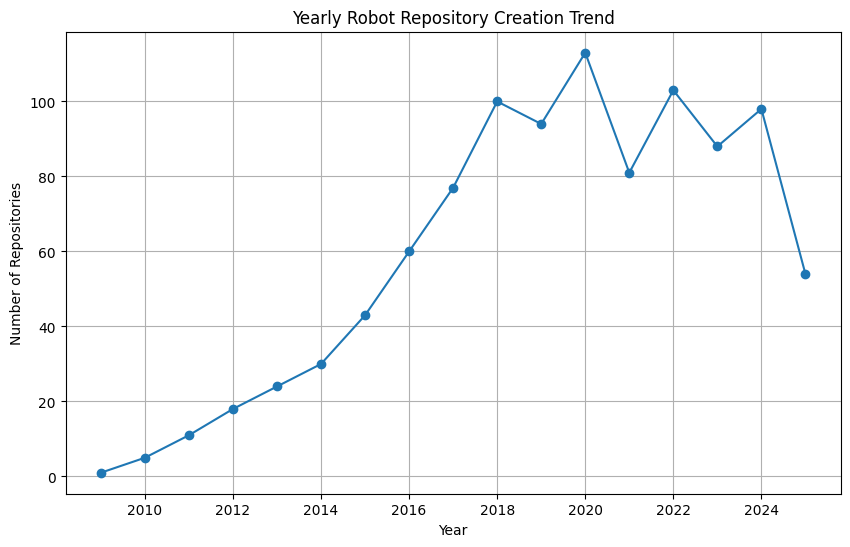

Ïù∏ÏÇ¨Ïù¥Ìä∏: Î°úÎ¥á Í¥ÄÎ†® Ïò§ÌîàÏÜåÏä§Í∞Ä Ïñ∏Ï†úÎ∂ÄÌÑ∞ ÌôúÎ∞úÌï¥Ï°åÎäîÏßÄ
Î°úÎ¥á ÌîÑÎ°úÏ†ùÌä∏Îäî 2010ÎÖÑÎåÄ Ï¥àÎ∞òÎ∂ÄÌÑ∞ Ï¶ùÍ∞ÄÌïòÍ∏∞ ÏãúÏûëÌñàÏúºÎ©∞, 2020ÎÖÑÎåÄ Îì§Ïñ¥ Í∏âÍ≤©Ìûà ÏÑ±Ïû•ÌñàÏäµÎãàÎã§.


In [9]:
# Ïó∞ÎèÑÎ≥Ñ Î°úÎ¥á Í¥ÄÎ†® Î†àÌè¨ÏßÄÌÜ†Î¶¨ ÏÉùÏÑ± Ï∂îÏù¥
# Îç∞Ïù¥ÌÑ∞: created_at
# ÏãúÍ∞ÅÌôî: Line chart
yearly_projects = df_git.groupby('year').size()

plt.figure(figsize=(10, 6))
yearly_projects.plot(kind='line', marker='o')
plt.title('Yearly Robot Repository Creation Trend')
plt.xlabel('Year')
plt.ylabel('Number of Repositories')
plt.grid(True)
plt.show()

# Ïù∏ÏÇ¨Ïù¥Ìä∏ Ï∂úÎ†•
print("Ïù∏ÏÇ¨Ïù¥Ìä∏: Î°úÎ¥á Í¥ÄÎ†® Ïò§ÌîàÏÜåÏä§Í∞Ä Ïñ∏Ï†úÎ∂ÄÌÑ∞ ÌôúÎ∞úÌï¥Ï°åÎäîÏßÄ")
print("Î°úÎ¥á ÌîÑÎ°úÏ†ùÌä∏Îäî 2010ÎÖÑÎåÄ Ï¥àÎ∞òÎ∂ÄÌÑ∞ Ï¶ùÍ∞ÄÌïòÍ∏∞ ÏãúÏûëÌñàÏúºÎ©∞, 2020ÎÖÑÎåÄ Îì§Ïñ¥ Í∏âÍ≤©Ìûà ÏÑ±Ïû•ÌñàÏäµÎãàÎã§.")

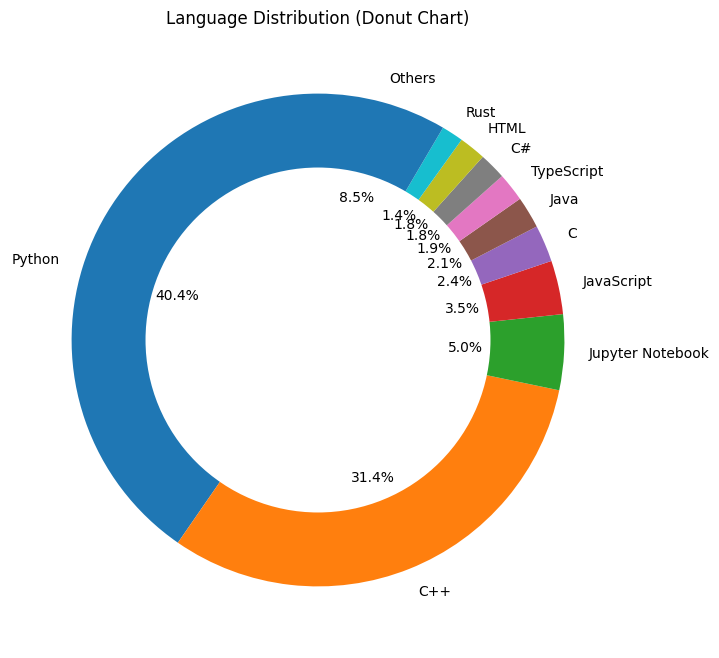

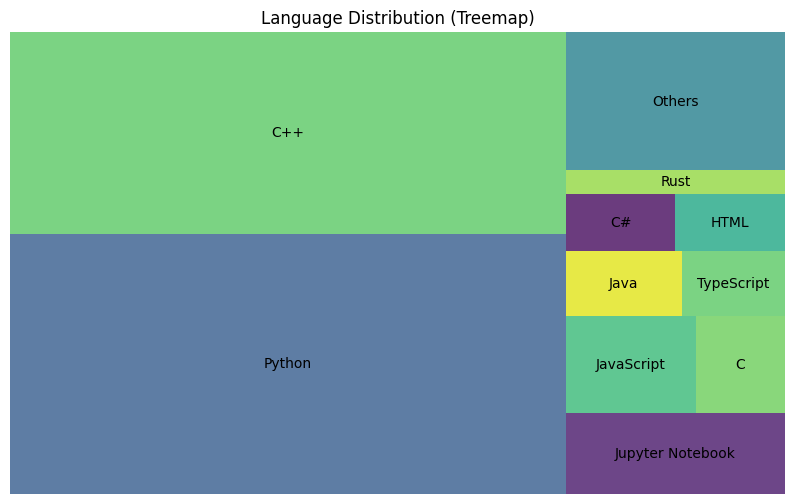

Ïù∏ÏÇ¨Ïù¥Ìä∏: Python, C++, ROS Í∏∞Î∞ò ÌîÑÎ°úÏ†ùÌä∏ ÎπÑÏ§ë ÌååÏïÖ
PythonÍ≥º C++Ïù¥ Ï£ºÏöî Ïñ∏Ïñ¥Î°ú, Î°úÎ¥á Î∂ÑÏïºÏóêÏÑú PythonÏùò ÎπÑÏ§ëÏù¥ ÎÜíÏïÑ ROS Îì±Ïùò ÏòÅÌñ•ÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.


In [10]:
# Ïñ∏Ïñ¥Î≥Ñ ÎπÑÏ§ë
# Îç∞Ïù¥ÌÑ∞: language
# ÏãúÍ∞ÅÌôî: Donut chart (matplotlibÎ°ú Íµ¨ÌòÑ)
language_dist = df_git['language'].value_counts().head(10)  # ÏÉÅÏúÑ 10Í∞ú
others = df_git['language'].value_counts()[10:].sum()
if others > 0:
    language_dist['Others'] = others

plt.figure(figsize=(8, 8))
plt.pie(language_dist, labels=language_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Language Distribution (Donut Chart)')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

# Treemap ÎåÄÏïà (squarify ÏÇ¨Ïö©)
plt.figure(figsize=(10, 6))
squarify.plot(sizes=language_dist, label=language_dist.index, alpha=0.8)
plt.axis('off')
plt.title('Language Distribution (Treemap)')
plt.show()

# Ïù∏ÏÇ¨Ïù¥Ìä∏ Ï∂úÎ†•
print("Ïù∏ÏÇ¨Ïù¥Ìä∏: Python, C++, ROS Í∏∞Î∞ò ÌîÑÎ°úÏ†ùÌä∏ ÎπÑÏ§ë ÌååÏïÖ")
print("PythonÍ≥º C++Ïù¥ Ï£ºÏöî Ïñ∏Ïñ¥Î°ú, Î°úÎ¥á Î∂ÑÏïºÏóêÏÑú PythonÏùò ÎπÑÏ§ëÏù¥ ÎÜíÏïÑ ROS Îì±Ïùò ÏòÅÌñ•ÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.")

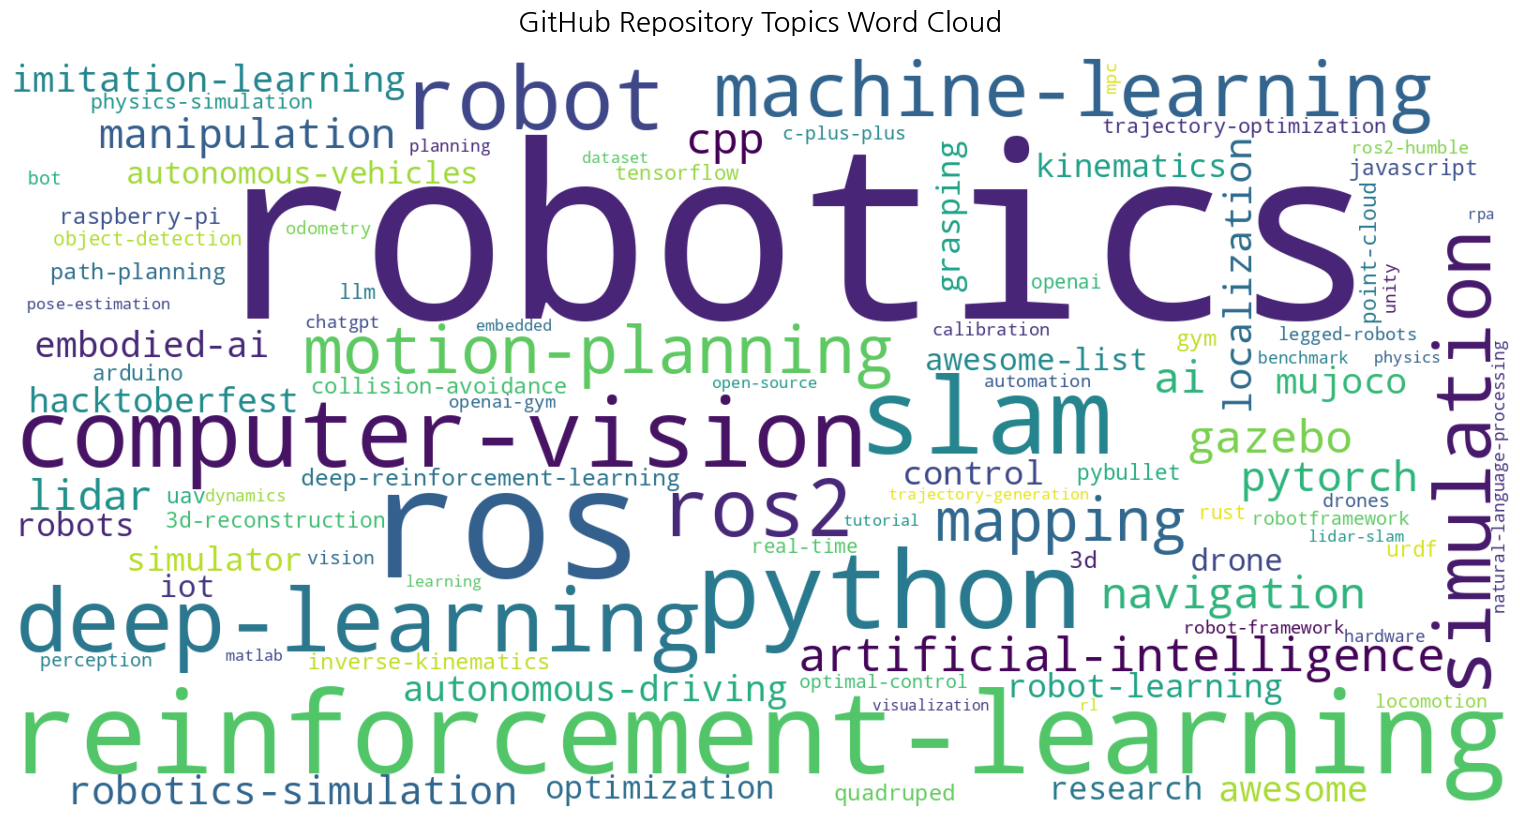


=== ÏÉÅÏúÑ 20Í∞ú ÌÜ†ÌîΩ ===
robotics: 538Ìöå
ros: 146Ìöå
reinforcement-learning: 90Ìöå
python: 79Ìöå
slam: 78Ìöå
computer-vision: 75Ìöå
deep-learning: 74Ìöå
robot: 72Ìöå
ros2: 59Ìöå
simulation: 56Ìöå
machine-learning: 55Ìöå
motion-planning: 41Ìöå
mapping: 34Ìöå
artificial-intelligence: 34Ìöå
gazebo: 32Ìöå
ai: 30Ìöå
cpp: 30Ìöå
navigation: 30Ìöå
pytorch: 28Ìöå
lidar: 28Ìöå


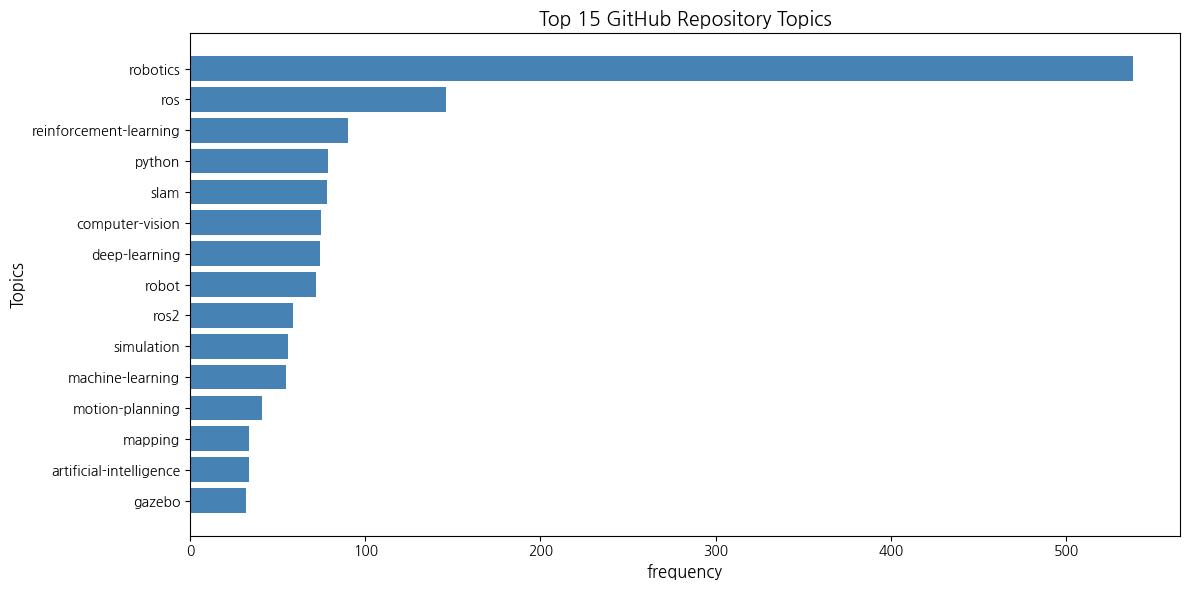

In [ ]:
# topics Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
def extract_topics(df):
    """
    topics Ïª¨ÎüºÏóêÏÑú Î™®Îì† ÌÜ†ÌîΩÏùÑ Ï∂îÏ∂úÌïòÍ≥† ÎπàÎèÑÏàò Í≥ÑÏÇ∞
    """
    all_topics = []
    
    for topics in df['topics'].dropna():
        # Î¨∏ÏûêÏó¥Î°ú Ï†ÄÏû•Îêú Î¶¨Ïä§Ìä∏Î•º Ïã§Ï†ú Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
        if isinstance(topics, str):
            try:
                # Î¶¨Ïä§Ìä∏ ÌòïÌÉúÏùò Î¨∏ÏûêÏó¥Ïù∏ Í≤ΩÏö∞
                topics_list = ast.literal_eval(topics)
            except:
                # ÏâºÌëúÎ°ú Íµ¨Î∂ÑÎêú Î¨∏ÏûêÏó¥Ïù∏ Í≤ΩÏö∞
                topics_list = [t.strip() for t in topics.split(',')]
        elif isinstance(topics, list):
            topics_list = topics
        else:
            continue
        
        # Í∞Å ÌÜ†ÌîΩÏùÑ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
        all_topics.extend(topics_list)
    
    return all_topics

# ÌÜ†ÌîΩ Ï∂îÏ∂ú
topics_list = extract_topics(df_git)

# ÌÜ†ÌîΩ ÎπàÎèÑÏàò Í≥ÑÏÇ∞
topic_freq = Counter(topics_list)

# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
plt.figure(figsize=(15, 8))

wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis',
    relative_scaling=0.5,
    min_font_size=10,
    max_words=100
).generate_from_frequencies(topic_freq)

# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('GitHub Repository Topics Word Cloud', fontsize=20, pad=20)
plt.tight_layout(pad=0)
plt.savefig('github_topics_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

# ÏÉÅÏúÑ 20Í∞ú ÌÜ†ÌîΩ Ï∂úÎ†•
print("\n=== ÏÉÅÏúÑ 20Í∞ú ÌÜ†ÌîΩ ===")
for topic, count in topic_freq.most_common(20):
    print(f"{topic}: {count}Ìöå")

# Ï∂îÍ∞Ä: ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°úÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
top_topics = dict(topic_freq.most_common(15))
plt.barh(list(top_topics.keys()), list(top_topics.values()), color='steelblue')
plt.xlabel('frequency', fontsize=12)
plt.ylabel('Topics', fontsize=12)
plt.title('Top 15 GitHub Repository Topics', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('github_topics_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
import requests
import pandas as pd
import xml.etree.ElementTree as ET
import time
import os
from datetime import datetime

# ---------------------------
# CONFIG
# ---------------------------
BASE_QUERY = "robotics"
START_YEAR = 2000
END_YEAR = 2025
MAX_RESULTS = 100
SLEEP_TIME = 3
OUTPUT_FOLDER = "arxiv_robotics_by_year"
HEADERS = {"User-Agent": "arXivRoboticsCollector/1.0 (your_email@example.com)"}

# Í∞Å Ïó∞ÎèÑÎ•º ÏõîÎ≥ÑÎ°ú ÏÑ∏Î∂ÑÌôîÌïòÏó¨ API Ï†úÌïú ÌöåÌîº
MONTHS = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# ---------------------------
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

def search_arxiv(query, start=0, max_results=100):
    url = "http://export.arxiv.org/api/query"
    params = {
        "search_query": query,
        "start": start,
        "max_results": max_results,
        "sortBy": "submittedDate",
        "sortOrder": "ascending"
    }
    
    try:
        response = requests.get(url, params=params, headers=HEADERS, timeout=30)
        if response.status_code != 200:
            print(f"Error {response.status_code}")
            return []
        
        root = ET.fromstring(response.text)
        ns = {"atom": "http://www.w3.org/2005/Atom"}
        
        papers = []
        for entry in root.findall("atom:entry", ns):
            arxiv_id = entry.find("atom:id", ns).text.strip()
            title = entry.find("atom:title", ns).text.strip()
            abstract = entry.find("atom:summary", ns).text.strip()
            published = entry.find("atom:published", ns).text.strip()
            authors = [a.find("atom:name", ns).text for a in entry.findall("atom:author", ns)]
            
            # Primary category Ï∂îÏ∂ú
            primary_category_elem = entry.find("arxiv:primary_category", {**ns, "arxiv": "http://arxiv.org/schemas/atom"})
            primary_category = primary_category_elem.get("term") if primary_category_elem is not None else ""
            
            # Î™®Îì† categories Ï∂îÏ∂ú
            categories = [cat.get("term") for cat in entry.findall("atom:category", ns)]
            
            papers.append({
                "id": arxiv_id,
                "title": title,
                "abstract": abstract,
                "published": published,
                "authors": ", ".join(authors),
                "primary_category": primary_category,
                "categories": ", ".join(categories)
            })
        
        return papers
    
    except Exception as e:
        print(f"Exception: {e}")
        return []

def save_papers(papers, year):
    """Save papers to yearly CSV (remove duplicates)"""
    if not papers:
        return
    
    file_path = os.path.join(OUTPUT_FOLDER, f"arxiv_robotics_{year}.csv")
    
    if os.path.exists(file_path):
        df_existing = pd.read_csv(file_path)
    else:
        df_existing = pd.DataFrame(columns=["id","title","abstract","published","authors","primary_category","categories"])
    
    df_new = pd.DataFrame(papers)
    df_combined = pd.concat([df_existing, df_new], ignore_index=True)
    df_combined.drop_duplicates(subset=["id"], inplace=True)
    df_combined.to_csv(file_path, index=False, encoding="utf-8-sig")
    
    print(f"  Saved {len(papers)} papers to {file_path} (Total: {len(df_combined)})")

# Strategy: Year + Month segmentation

for year in range(START_YEAR, END_YEAR + 1):
    print(f"\nYear {year}")
    
    for month in MONTHS:
        # Date range query
        start_date = f"{year}{month}01"
        
        # Calculate next month
        if month == "12":
            end_date = f"{year+1}0101"
        else:
            next_month = str(int(month) + 1).zfill(2)
            end_date = f"{year}{next_month}01"
        
        # arXiv date filter query (YYYYMMDD format)
        query = f"{BASE_QUERY} AND submittedDate:[{start_date} TO {end_date}]"
        
        print(f"  {year}-{month}: {query}")
        
        start = 0
        month_papers = []
        
        while True:
            papers = search_arxiv(query=query, start=start, max_results=MAX_RESULTS)
            
            if not papers:
                break
            
            month_papers.extend(papers)
            
            if len(papers) < MAX_RESULTS:
                break
            
            start += MAX_RESULTS
            print(f"    Fetched {len(papers)} papers (total: {len(month_papers)})")
            time.sleep(SLEEP_TIME)
        
        # Save monthly results
        save_papers(month_papers, year)
        time.sleep(SLEEP_TIME)

print("\n\nCOLLECTION COMPLETE")
print(f"Results saved in: {OUTPUT_FOLDER}/")

# Final statistics
total_papers = 0
for year in range(START_YEAR, END_YEAR + 1):
    file_path = os.path.join(OUTPUT_FOLDER, f"arxiv_robotics_{year}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        count = len(df)
        total_papers += count
        print(f"  {year}: {count:,} papers")

print(f"\nTotal collected: {total_papers:,} papers")


Year 2000
  2000-01: robotics AND submittedDate:[20000101 TO 20000201]
  Saved 1 papers to arxiv_robotics_by_year/arxiv_robotics_2000.csv (Total: 1)
  2000-02: robotics AND submittedDate:[20000201 TO 20000301]
  Saved 1 papers to arxiv_robotics_by_year/arxiv_robotics_2000.csv (Total: 2)
  2000-03: robotics AND submittedDate:[20000301 TO 20000401]
  Saved 2 papers to arxiv_robotics_by_year/arxiv_robotics_2000.csv (Total: 4)
  2000-04: robotics AND submittedDate:[20000401 TO 20000501]
  2000-05: robotics AND submittedDate:[20000501 TO 20000601]
  Saved 2 papers to arxiv_robotics_by_year/arxiv_robotics_2000.csv (Total: 6)
  2000-06: robotics AND submittedDate:[20000601 TO 20000701]
  Saved 5 papers to arxiv_robotics_by_year/arxiv_robotics_2000.csv (Total: 11)
  2000-07: robotics AND submittedDate:[20000701 TO 20000801]
  2000-08: robotics AND submittedDate:[20000801 TO 20000901]
  2000-09: robotics AND submittedDate:[20000901 TO 20001001]
  Saved 5 papers to arxiv_robotics_by_year/arxiv_

In [2]:
import pandas as pd
import os
from glob import glob

# ---------------------------
# CONFIG
# ---------------------------
INPUT_FOLDER = "arxiv_robotics_by_year"
OUTPUT_FILE = "arxiv_robotics_all_merged.csv"

# ---------------------------
# CSV ÌååÏùºÎì§ Ï∞æÍ∏∞
# ---------------------------
csv_files = glob(os.path.join(INPUT_FOLDER, "arxiv_robotics_*.csv"))

if not csv_files:
    print(f"Error: No CSV files found in {INPUT_FOLDER}/")
    exit(1)

print(f"Found {len(csv_files)} CSV files")
print("-" * 50)

# ---------------------------
# Î™®Îì† CSV ÌååÏùº ÏùΩÏñ¥ÏÑú ÌÜµÌï©
# ---------------------------
dataframes = []

for file_path in sorted(csv_files):
    print(f"Reading: {os.path.basename(file_path)}")
    df = pd.read_csv(file_path)
    print(f"  Papers: {len(df):,}")
    dataframes.append(df)

# Î™®Îì† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ëÌï©
print("-" * 50)
print("Merging all dataframes...")
df_merged = pd.concat(dataframes, ignore_index=True)
print(f"Total papers before deduplication: {len(df_merged):,}")

# Ï§ëÎ≥µ Ï†úÍ±∞ (id Í∏∞Ï§Ä)
df_merged.drop_duplicates(subset=["id"], inplace=True)
print(f"Total papers after deduplication: {len(df_merged):,}")

# ---------------------------
# Î∞úÌñâÎÇ†Ïßú Í∏∞Ï§Ä Ï†ïÎ†¨
# ---------------------------
print("-" * 50)
print("Sorting by published date...")

# published Ïª¨ÎüºÏùÑ datetimeÏúºÎ°ú Î≥ÄÌôò
df_merged["published"] = pd.to_datetime(df_merged["published"])

# Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨
df_merged.sort_values(by="published", ascending=True, inplace=True)

# publishedÎ•º Îã§Ïãú Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò (ÏõêÎûò ÌòïÏãù Ïú†ÏßÄ)
df_merged["published"] = df_merged["published"].astype(str)

# ---------------------------
# Ï†ÄÏû•
# ---------------------------
df_merged.to_csv(OUTPUT_FILE, index=False, encoding="utf-8-sig")
print(f"Saved to: {OUTPUT_FILE}")

# ---------------------------
# ÌÜµÍ≥Ñ Ï∂úÎ†•
# ---------------------------
print("-" * 50)
print("SUMMARY")
print("-" * 50)
print(f"Total unique papers: {len(df_merged):,}")

# Ïó∞ÎèÑÎ≥Ñ ÌÜµÍ≥Ñ
df_merged["year"] = pd.to_datetime(df_merged["published"]).dt.year
year_counts = df_merged["year"].value_counts().sort_index()

print("\nPapers by year:")
for year, count in year_counts.items():
    print(f"  {int(year)}: {count:,} papers")

print(f"\nFirst paper: {df_merged.iloc[0]['published']}")
print(f"Last paper: {df_merged.iloc[-1]['published']}")
print("\nMerge complete!")

Found 26 CSV files
--------------------------------------------------
Reading: arxiv_robotics_2000.csv
  Papers: 18
Reading: arxiv_robotics_2001.csv
  Papers: 14
Reading: arxiv_robotics_2002.csv
  Papers: 27
Reading: arxiv_robotics_2003.csv
  Papers: 21
Reading: arxiv_robotics_2004.csv
  Papers: 44
Reading: arxiv_robotics_2005.csv
  Papers: 45
Reading: arxiv_robotics_2006.csv
  Papers: 75
Reading: arxiv_robotics_2007.csv
  Papers: 148
Reading: arxiv_robotics_2008.csv
  Papers: 107
Reading: arxiv_robotics_2009.csv
  Papers: 124
Reading: arxiv_robotics_2010.csv
  Papers: 136
Reading: arxiv_robotics_2011.csv
  Papers: 196
Reading: arxiv_robotics_2012.csv
  Papers: 284
Reading: arxiv_robotics_2013.csv
  Papers: 357
Reading: arxiv_robotics_2014.csv
  Papers: 471
Reading: arxiv_robotics_2015.csv
  Papers: 608
Reading: arxiv_robotics_2016.csv
  Papers: 1,070
Reading: arxiv_robotics_2017.csv
  Papers: 1,728
Reading: arxiv_robotics_2018.csv
  Papers: 2,327
Reading: arxiv_robotics_2019.csv
  Pap

In [13]:
df_arxiv = pd.read_csv('arxiv_robotics_all_merged.csv')

# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò (ÌÉÄÏûÑÏ°¥ Ï†ïÎ≥¥ Ï†úÍ±∞)
df_arxiv['published'] = pd.to_datetime(df_arxiv['published'])
df_arxiv['year'] = df_arxiv['published'].dt.year

df_arxiv.head(5)

id  \
0  http://arxiv.org/abs/astro-ph/0001438v1   
1        http://arxiv.org/abs/cs/0002014v1   
2  http://arxiv.org/abs/quant-ph/0003006v2   
3        http://arxiv.org/abs/cs/0003032v1   
4   http://arxiv.org/abs/physics/0005062v1   

                                               title  \
0    Prompt Optical Observations of Gamma-ray Bursts   
1          Safe cooperative robot dynamics on graphs   
2                Space Searches with a Quantum Robot   
3  cc-Golog: Towards More Realistic Logic-Based R...   
4    Applying MDL to Learning Best Model Granularity   

                                            abstract  \
0  The Robotic Optical Transient Search Experimen...   
1  This paper initiates the use of vector fields ...   
2  Quantum robots are described as mobile quantum...   
3  High-level robot controllers in realistic doma...   
4  The Minimum Description Length (MDL) principle...   

                  published  \
0 2000-01-25 18:34:02+00:00   
1 2000-02-24 18:13:33+00:00   
2 2000-03-01 21:54:24+00:00   
3 2000-03-08 16:14:08+00:00   
4 2000-05-23 14:50:07+00:00   

                                             authors primary_category  \
0  Carl Akerlof, Richard Balsano, Scott Barthelmy...         astro-ph   
1                   Robert Ghrist, Daniel Koditschek            cs.RO   
2                                       Paul Benioff         quant-ph   
3              Henrik Grosskreutz, Gerhard Lakemeyer            cs.AI   
4                   Qiong Gao, Ming Li, Paul Vitanyi  physics.data-an   

                      categories  year  
0                       astro-ph  2000  
1            cs.RO, cs.AI, I.2.9  2000  
2                       quant-ph  2000  
3             cs.AI, I.2.3;I.2.8  2000  
4  physics.data-an, cs.AI, cs.CV  2000

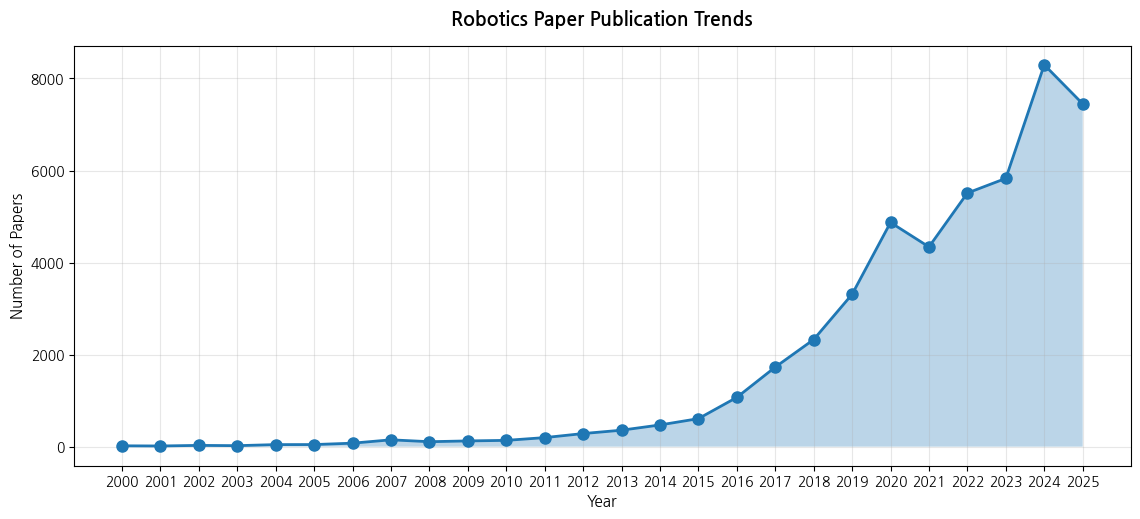

In [31]:
# Figure ÏÉùÏÑ±
fig = plt.figure(figsize=(30, 12))

# ============================================
# 1. ÎÖºÎ¨∏ Ï∂úÌåê ÎèôÌñ• (ÏãúÍ∞ÑÎ≥Ñ Ï∂îÏù¥)
# ============================================
ax1 = plt.subplot(2, 2, 1)

# Ïó∞ÎèÑÎ≥Ñ ÎÖºÎ¨∏ Ïàò ÏßëÍ≥Ñ
yearly_counts = df_arxiv.groupby('year').size()

# ÎùºÏù∏ Ï∞®Ìä∏
ax1.plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, markersize=8)
ax1.fill_between(yearly_counts.index, yearly_counts.values, alpha=0.3)
ax1.set_title('Robotics Paper Publication Trends', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('Number of Papers', fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(yearly_counts.index);

In [6]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import os
from dotenv import load_dotenv

# ÌôòÍ≤Ω Î≥ÄÏàò Î°úÎìú
load_dotenv()

CONFIG = {
    'github_token': os.getenv('GITHUB_TOKEN'),
    'host': os.getenv('DB_HOST'),
    'user': os.getenv('DB_USER'),
    'password': os.getenv('DB_PASSWORD'),
    'database': os.getenv('DB_NAME'),
}


# ==========================================
# Î∞©Î≤ï 1: SQLAlchemy ÏÇ¨Ïö© (Í∂åÏû•)
# ==========================================

def get_dataframe_sqlalchemy(table_name):
    """SQLAlchemyÎ•º ÏÇ¨Ïö©ÌïòÏó¨ RDS Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Í∞ÄÏ†∏Ïò§Í∏∞"""
    
    # CONFIGÏóêÏÑú Ïó∞Í≤∞ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
    DB_HOST = CONFIG['host']
    DB_PORT = 3306
    DB_USER = CONFIG['user']
    DB_PASSWORD = CONFIG['password']
    DB_NAME = CONFIG['database']
    
    # ÎπÑÎ∞ÄÎ≤àÌò∏Ïóê ÌäπÏàòÎ¨∏ÏûêÍ∞Ä ÏûàÏùÑ Í≤ΩÏö∞ URL Ïù∏ÏΩîÎî©
    encoded_password = quote_plus(DB_PASSWORD)
    
    # Ïó∞Í≤∞ Î¨∏ÏûêÏó¥ ÏÉùÏÑ±
    connection_string = f'mysql+pymysql://{DB_USER}:{encoded_password}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
    
    print(f"Ïó∞Í≤∞ ÏãúÎèÑ Ï§ë: {DB_HOST}")
    
    engine = None
    try:
        # ÏóîÏßÑ ÏÉùÏÑ±
        engine = create_engine(connection_string, connect_args={'connect_timeout': 10})
        
        # Î∞©Î≤ï 1: ÌÖåÏù¥Î∏îÎ™Ö Í≤ÄÏ¶ù ÌõÑ ÏøºÎ¶¨ ÏÉùÏÑ± (Í∂åÏû•)
        # ÌÖåÏù¥Î∏îÎ™ÖÏóê ÌäπÏàòÎ¨∏ÏûêÍ∞Ä ÏóÜÎäîÏßÄ Í≤ÄÏ¶ù
        if not table_name.replace('_', '').isalnum():
            raise ValueError(f"Ïú†Ìö®ÌïòÏßÄ ÏïäÏùÄ ÌÖåÏù¥Î∏îÎ™Ö: {table_name}")
        
        query = f"SELECT * FROM `{table_name}`"  # Î∞±Ìã±ÏúºÎ°ú ÌÖåÏù¥Î∏îÎ™Ö Í∞êÏã∏Í∏∞
        df = pd.read_sql(query, engine)
        
        print(f"Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: {len(df)}Í∞ú Ìñâ")
        print(f"Ïª¨Îüº: {df.columns.tolist()}")
        
        return df
        
    except Exception as e:
        print(f"ÏóêÎü¨ Î∞úÏÉù: {e}")
        return None
    finally:
        if engine:
            engine.dispose()
# ==========================================
# Ïó∞Í≤∞ ÌÖåÏä§Ìä∏ Ìï®Ïàò
# ==========================================

def test_connection():
    """RDS Ïó∞Í≤∞ ÌÖåÏä§Ìä∏"""
    
    DB_CONFIG = {
        'host': CONFIG['host'],
        'port': 3306,
        'user': CONFIG['user'],
        'password': CONFIG['password'],
        'database': CONFIG['database'],
        'connect_timeout': 10
    }
    
    print("=== RDS Ïó∞Í≤∞ ÌÖåÏä§Ìä∏ ===")
    print(f"Host: {DB_CONFIG['host']}")
    print(f"User: {DB_CONFIG['user']}")
    print(f"Database: {DB_CONFIG['database']}")
    print()
    
    try:
        connection = pymysql.connect(**DB_CONFIG)
        print("‚úì Ïó∞Í≤∞ ÏÑ±Í≥µ!")
        
        # ÌÖåÏù¥Î∏î Ï°¥Ïû¨ ÌôïÏù∏
        with connection.cursor() as cursor:
            cursor.execute("SHOW TABLES")
            tables = cursor.fetchall()
            print(f"‚úì ÌÖåÏù¥Î∏î Î™©Î°ù: {tables}")
            
            # github_repos ÌÖåÏù¥Î∏î Ìñâ Ïàò ÌôïÏù∏
            cursor.execute("SELECT COUNT(*) FROM github_repos")
            count = cursor.fetchone()[0]
            print(f"‚úì github_repos Ìñâ Ïàò: {count}")
        
        connection.close()
        return True
        
    except Exception as e:
        print(f"‚úó Ïó∞Í≤∞ Ïã§Ìå®: {e}")
        return False


# ==========================================
# ÏÇ¨Ïö© ÏòàÏãú
# ==========================================

if __name__ == "__main__":
    # Î®ºÏ†Ä Ïó∞Í≤∞ ÌÖåÏä§Ìä∏
    if not test_connection():
        print("\nÏó∞Í≤∞ Ïã§Ìå®. .env ÌååÏùºÍ≥º RDS Î≥¥Ïïà Í∑∏Î£πÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
        exit(1)
    
    print("\n=== Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏãúÏûë ===")
    
    # Î∞©Î≤ï 1: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
    df = get_dataframe_sqlalchemy('github_readmes')
    
    if df is not None:
        print("\nÎç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ≥¥:")
        print(df.info())
        print("\nÏÉÅÏúÑ 5Í∞ú Ìñâ:")
        print(df.head())
        
        # Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏòàÏãú
        print("\n=== Í∏∞Î≥∏ ÌÜµÍ≥Ñ ===")
        print(f"Ï†ÑÏ≤¥ Ï†ÄÏû•ÏÜå Ïàò: {len(df)}")
        
        if 'language' in df.columns:
            print("\nÏñ∏Ïñ¥Î≥Ñ Ï†ÄÏû•ÏÜå Ïàò (ÏÉÅÏúÑ 10Í∞ú):")
            print(df['language'].value_counts().head(10))
        
        if 'stargazers_count' in df.columns:
            print(f"\nÌèâÍ∑† Star Ïàò: {df['stargazers_count'].mean():.2f}")
            print(f"ÏµúÎåÄ Star Ïàò: {df['stargazers_count'].max()}")
            print(f"\nStar Ïàò ÏÉÅÏúÑ 5Í∞ú:")
            print(df.nlargest(5, 'stargazers_count')[['full_name', 'stargazers_count', 'language']])
    
    # Î∞©Î≤ï 2: Ï°∞Í±¥Î∂Ä ÏøºÎ¶¨ ÏòàÏãú
    # df_python = get_filtered_dataframe(limit=100, language='Python', min_stars=1000)
    # print(f"\nPython Ï†ÄÏû•ÏÜå (Star >= 1000): {len(df_python)}Í∞ú")

=== RDS Ïó∞Í≤∞ ÌÖåÏä§Ìä∏ ===
Host: database-1.chu0kq8imwi9.ap-northeast-2.rds.amazonaws.com
User: root
Database: trendbot

‚úì Ïó∞Í≤∞ ÏÑ±Í≥µ!
‚úì ÌÖåÏù¥Î∏î Î™©Î°ù: (('arxiv_robotics',), ('github_readmes',), ('github_repo',), ('github_repos',), ('kipris_patent',))
‚úì github_repos Ìñâ Ïàò: 976

=== Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏãúÏûë ===
Ïó∞Í≤∞ ÏãúÎèÑ Ï§ë: database-1.chu0kq8imwi9.ap-northeast-2.rds.amazonaws.com
Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: 411Í∞ú Ìñâ
Ïª¨Îüº: ['full_name', 'readme']

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_name  411 non-null    object
 1   readme     411 non-null    object
dtypes: object(2)
memory usage: 6.6+ KB
None

ÏÉÅÏúÑ 5Í∞ú Ìñâ:
                      full_name  \
0  Developer-Y/cs-video-courses   
1             commaai/openpilot   
2                mudler/LocalAI   
3   Genesis-Embodied-AI/Genesis   
4  

In [ ]:
df_github_repos = get_dataframe_sqlalchemy('github_repos')
df_github_repos['created_at'] = pd.to_datetime(df_github_repos['created_at'])
df_github_repos['year'] = df_github_repos['created_at'].dt.year

df_github_readmes = get_dataframe_sqlalchemy('github_readmes')
df_merged_github = pd.merge(
    df_github_repos,
    df_github_readmes,
    on='full_name',  # Ï°∞Ïù∏ Í∏∞Ï§ÄÏúºÎ°ú ÏÇ¨Ïö©Ìï† Ïª¨Îüº ÏßÄÏ†ï
    how='left'     # Ï°∞Ïù∏ Î∞©Ïãù ÏßÄÏ†ï
)

Ïó∞Í≤∞ ÏãúÎèÑ Ï§ë: database-1.chu0kq8imwi9.ap-northeast-2.rds.amazonaws.com
Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: 976Í∞ú Ìñâ
Ïª¨Îüº: ['id', 'full_name', 'stargazers_count', 'forks_count', 'language', 'created_at', 'updated_at', 'open_issues_count', 'topics', 'license', 'owner', 'description', 'is_fork', 'collected_at']
Ïó∞Í≤∞ ÏãúÎèÑ Ï§ë: database-1.chu0kq8imwi9.ap-northeast-2.rds.amazonaws.com
Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: 411Í∞ú Ìñâ
Ïª¨Îüº: ['full_name', 'readme']


In [18]:
df_merged_github.head(5)

id                            full_name  stargazers_count  forks_count  \
0  312463               jazzband/django-robots               476          103   
1  665764      visionworkbench/visionworkbench               495          234   
2  675088                            rtv/Stage               416          185   
3  714891   NeoGeographyToolkit/StereoPipeline               564          187   
4  888427  the-blue-alliance/the-blue-alliance               419          185   

  language          created_at          updated_at  open_issues_count  \
0   Python 2009-09-20 15:27:41 2025-09-22 12:18:31                 22   
1      C++ 2010-05-14 02:48:33 2025-10-09 20:41:42                  2   
2      C++ 2010-05-19 13:40:02 2025-09-19 08:33:22                 28   
3      C++ 2010-06-11 02:11:55 2025-10-22 14:35:21                 27   
4     HTML 2010-09-04 20:34:11 2025-10-23 18:15:11                525   

                                              topics       license  \
0                                                 []  BSD-3-Clause   
1                                                 []   NOASSERTION   
2                                                 []       GPL-2.0   
3                                                 []    Apache-2.0   
4  ["first-frc", "first-robotics-competition", "f...           MIT   

                 owner                                        description  \
0             jazzband  A Django app for managing robots.txt files fol...   
1      visionworkbench  The NASA Vision Workbench is a general purpose...   
2                  rtv                             Mobile robot simulator   
3  NeoGeographyToolkit  The NASA Ames Stereo Pipeline is a suite of au...   
4    the-blue-alliance  A webapp for accessing information about the F...   

   is_fork        collected_at  year readme  
0        0 2025-10-24 02:04:34  2009    NaN  
1        0 2025-10-24 02:04:34  2010    NaN  
2        0 2025-10-24 02:04:34  2010    NaN  
3        0 2025-10-24 02:04:34  2010    NaN  
4        0 2025-10-24 02:04:34  2010    NaN

In [4]:
df_arxiv = pd.read_csv('arxiv_robotics_all_merged.csv')

df_arxiv['published'] = pd.to_datetime(df_arxiv['published'])
df_arxiv['year'] = df_arxiv['published'].dt.year


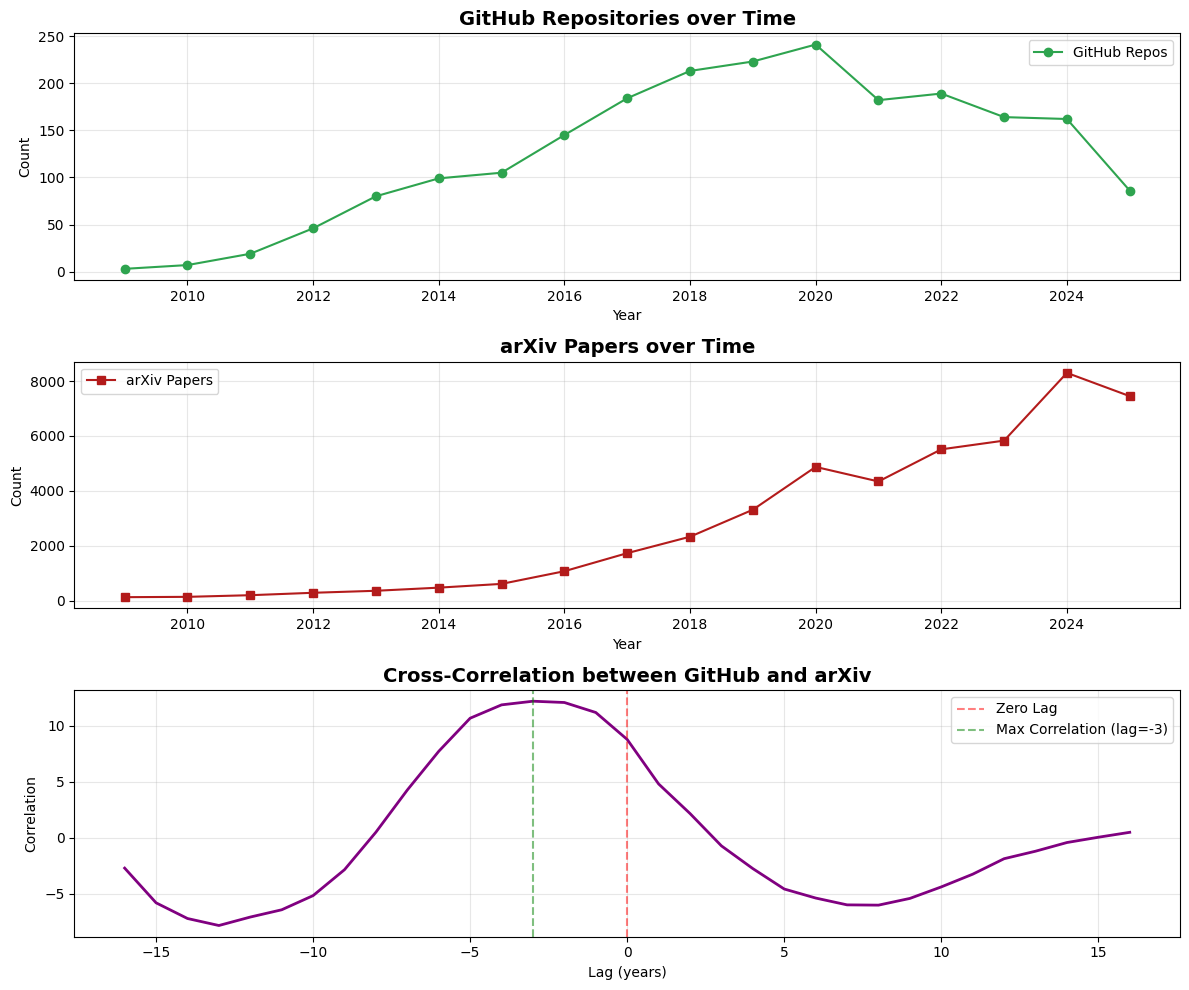

=== Cross-Correlation Analysis ===
Maximum correlation: 12.1806
Lag at maximum correlation: -3 years

Interpretation:
arXiv leads GitHub by 3 year(s)

Pearson correlation at zero lag: 0.5482


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns

# 1. Ïó∞ÎèÑÎ≥Ñ ÏßëÍ≥Ñ
github_counts = df_github_repos['year'].value_counts().sort_index()
arxiv_counts = df_arxiv['year'].value_counts().sort_index()

# 2. Í≥µÌÜµ Ïó∞ÎèÑ Î≤îÏúÑ Ï∞æÍ∏∞
common_years = sorted(set(github_counts.index) & set(arxiv_counts.index))
github_series = github_counts.reindex(common_years, fill_value=0)
arxiv_series = arxiv_counts.reindex(common_years, fill_value=0)

# 3. Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (ÌèâÍ∑† 0, Î∂ÑÏÇ∞ 1)
github_normalized = (github_series - github_series.mean()) / github_series.std()
arxiv_normalized = (arxiv_series - arxiv_series.mean()) / arxiv_series.std()

# 4. Cross-correlation Í≥ÑÏÇ∞
correlation = signal.correlate(github_normalized, arxiv_normalized, mode='full')
lags = signal.correlation_lags(len(github_normalized), len(arxiv_normalized), mode='full')

# 5. ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# 5-1. GitHub ÏãúÍ≥ÑÏó¥
axes[0].plot(common_years, github_series.values, marker='o', label='GitHub Repos', color='#2ea44f')
axes[0].set_title('GitHub Repositories over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 5-2. arXiv ÏãúÍ≥ÑÏó¥
axes[1].plot(common_years, arxiv_series.values, marker='s', label='arXiv Papers', color='#b31b1b')
axes[1].set_title('arXiv Papers over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 5-3. Cross-correlation
axes[2].plot(lags, correlation, color='purple', linewidth=2)
axes[2].axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Zero Lag')
max_corr_idx = np.argmax(correlation)
max_lag = lags[max_corr_idx]
axes[2].axvline(x=max_lag, color='green', linestyle='--', alpha=0.5, 
                label=f'Max Correlation (lag={max_lag})')
axes[2].set_title('Cross-Correlation between GitHub and arXiv', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Lag (years)')
axes[2].set_ylabel('Correlation')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. Ï∂îÍ∞Ä Î∂ÑÏÑù: ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï∂úÎ†•
print("=== Cross-Correlation Analysis ===")
print(f"Maximum correlation: {correlation[max_corr_idx]:.4f}")
print(f"Lag at maximum correlation: {max_lag} years")
print(f"\nInterpretation:")
if max_lag > 0:
    print(f"GitHub leads arXiv by {max_lag} year(s)")
elif max_lag < 0:
    print(f"arXiv leads GitHub by {abs(max_lag)} year(s)")
else:
    print("GitHub and arXiv are synchronized (no lag)")

# Pearson correlation at zero lag
zero_lag_corr = np.corrcoef(github_normalized, arxiv_normalized)[0, 1]
print(f"\nPearson correlation at zero lag: {zero_lag_corr:.4f}")

GitHub‚ÄìarXiv ÏãúÍ≥ÑÏó¥ Î∞è ÏÉÅÌò∏ÏÉÅÍ¥Ä(Cross-Correlation) Î∂ÑÏÑù
‚ÄúÏó∞Íµ¨Ïùò ÌôïÏÇ∞Ïù¥ Ïò§ÌîàÏÜåÏä§ Í∞úÎ∞úÏùÑ Ïù¥ÎÅÑÎäîÍ∞Ä?‚Äù

üîπ ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥
arXivÏùò Î°úÎ¥á Í¥ÄÎ†® ÎÖºÎ¨∏ ÏàòÏôÄ GitHubÏùò Î°úÎ¥á Í¥ÄÎ†® Ï†ÄÏû•ÏÜå ÏàòÏùò Ïó∞ÎèÑÎ≥Ñ Ï∂îÏÑ∏Î•º ÎπÑÍµê
Îëê ÏãúÍ≥ÑÏó¥ Í∞Ñ ÏãúÍ∞ÑÏ∞®(lag) Î•º Í≥†Î†§Ìïú Cross-Correlation Î∂ÑÏÑùÏùÑ ÌÜµÌï¥
‚ÄúÎÖºÎ¨∏ Ï¶ùÍ∞Ä ‚Üí Ïò§ÌîàÏÜåÏä§ Ï¶ùÍ∞Ä‚Äù ÌòπÏùÄ ‚ÄúÏò§ÌîàÏÜåÏä§ ÌôúÎèô ‚Üí Ïó∞Íµ¨ ÌôïÏÇ∞‚ÄùÏùò ÏÑ†ÌõÑ Í¥ÄÍ≥Ñ ÌÉêÏÉâ

üîπ ÏãúÍ∞ÅÌôî
1Ô∏è‚É£ ÏÉÅÎã® Í∑∏ÎûòÌîÑ: GitHub Ï†ÄÏû•ÏÜå ÏàòÏùò Ïó∞ÎèÑÎ≥Ñ Î≥ÄÌôî
2Ô∏è‚É£ Ï§ëÎã® Í∑∏ÎûòÌîÑ: arXiv ÎÖºÎ¨∏ ÏàòÏùò Ïó∞ÎèÑÎ≥Ñ Î≥ÄÌôî
3Ô∏è‚É£ ÌïòÎã® Í∑∏ÎûòÌîÑ: Cross-Correlation Í≤∞Í≥º

XÏ∂ï: ÏãúÍ∞ÑÏ∞®(lag, Îã®ÏúÑ=ÎÖÑ)
YÏ∂ï: ÏÉÅÍ¥ÄÍ≥ÑÏàò (correlation)
lag = -3Ïùº Îïå ÏµúÎåÄ ÏÉÅÍ¥Ä (green dashed line) ‚Üí ÎÖºÎ¨∏Ïù¥ ÏïΩ 3ÎÖÑ ÏÑ†ÌñâÌï† Îïå GitHubÏôÄ Í∞ÄÏû• ÎÜíÏùÄ ÏÉÅÍ¥Ä

üîπ ÌåêÎ≥Ñ Ìè¨Ïù∏Ìä∏
ÏñëÏùò ÏÉÅÍ¥ÄÏù¥ Í∞ÄÏû• ÌÅ¨Í≤å ÎÇòÌÉÄÎÇú ÏãúÏ†êÏù¥ lag = -3 ‚Üí ‚ÄúÏó∞Íµ¨Í∞Ä Î®ºÏ†Ä Ï¶ùÍ∞ÄÌïòÍ≥† Ïù¥ÌõÑ Ïò§ÌîàÏÜåÏä§ Í∞úÎ∞úÏù¥ Îî∞ÎùºÏò§Îäî Ìå®ÌÑ¥‚Äù
lag = 0 Î∂ÄÍ∑ºÏóêÏÑúÎèÑ ÏñëÏùò ÏÉÅÍ¥Ä Ï°¥Ïû¨ ‚Üí Ïó∞Íµ¨ÏôÄ Í∞úÎ∞úÏù¥ Î∂ÄÎ∂ÑÏ†ÅÏúºÎ°ú ÎèôÏãú ÏßÑÌñâÎêòÎäî ÌòÑÏÉÅÎèÑ ÏûàÏùå

üîπ Í≤∞Î°†
arXiv ÎÖºÎ¨∏ ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïú ÌõÑ ÏïΩ 3ÎÖÑ ÌõÑÏóê GitHub Ï†ÄÏû•ÏÜå ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•Ïù¥ Í¥ÄÏ∞∞Îê®.
Ïù¥Îäî Ïó∞Íµ¨Ïùò ÌôïÏÇ∞Ïù¥ Ïã§Î¨¥ Í∞úÎ∞úÎ°ú Ïù¥Ïñ¥ÏßÑÎã§Îäî Ï¶ùÍ±∞Î°ú Ìï¥ÏÑù Í∞ÄÎä•ÌïòÎ©∞,
Ï¶â ‚ÄúÏó∞Íµ¨ Í≤∞Í≥ºÍ∞Ä Ïò§ÌîàÏÜåÏä§ ÏÉùÌÉúÍ≥ÑÏùò ÌôúÏÑ±ÌôîÎ•º Ï£ºÎèÑÌïúÎã§‚ÄùÎäî ÌùêÎ¶ÑÏùÑ ÏãúÏÇ¨ÌïúÎã§.

ÌïÑÌÑ∞ÎßÅ Ï†Ñ - GitHub: 976, arXiv: 47407
ÌïÑÌÑ∞ÎßÅ ÌõÑ - GitHub: 976, arXiv: 47407


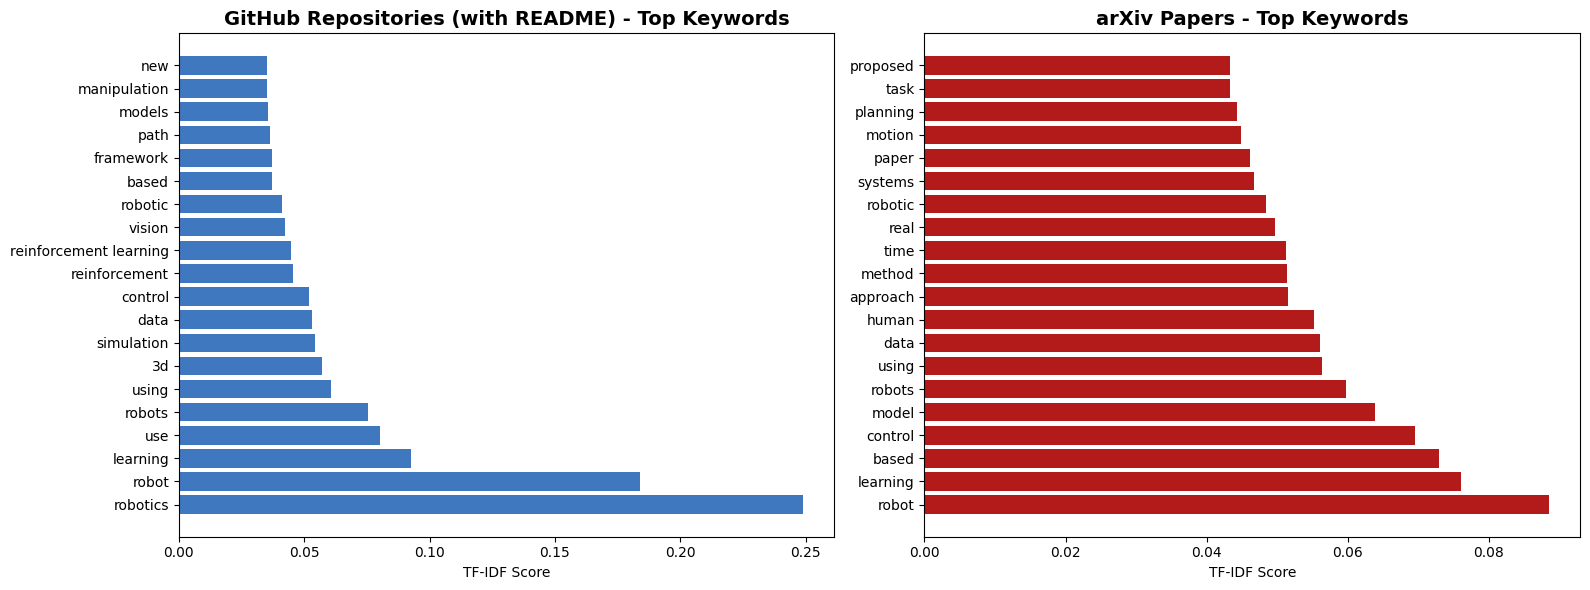

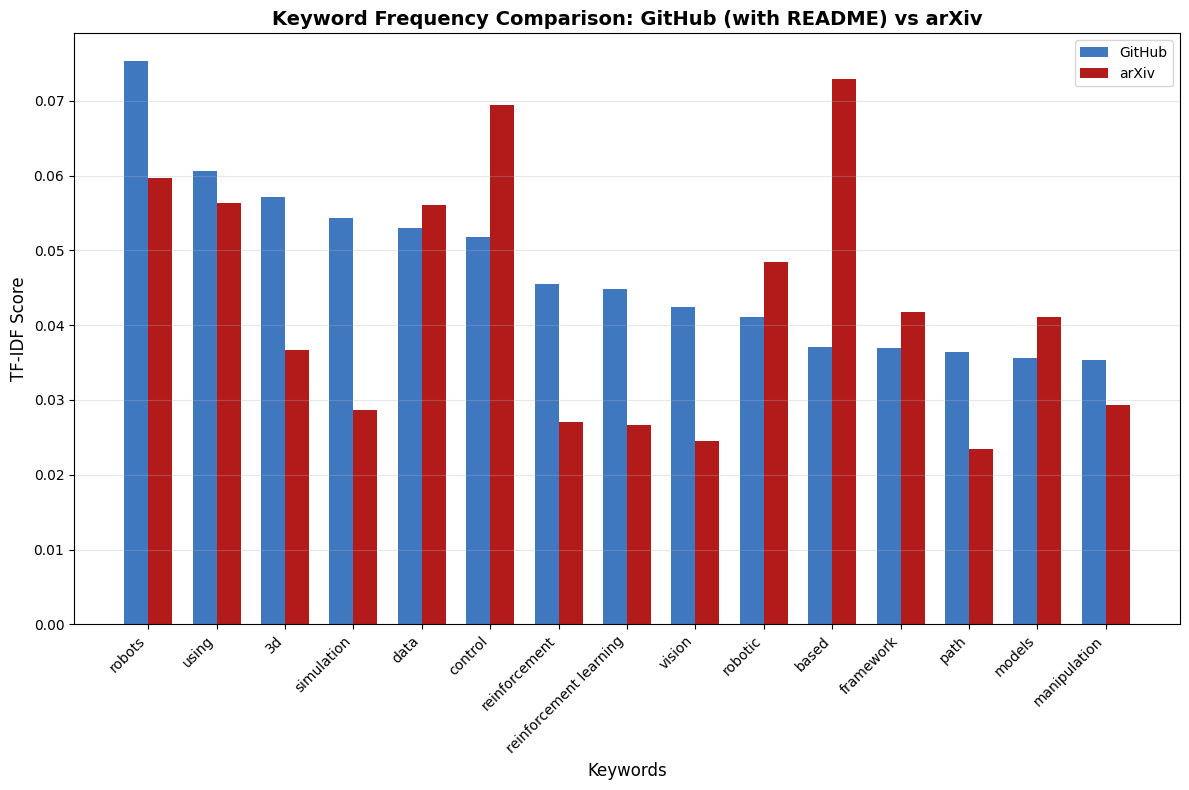

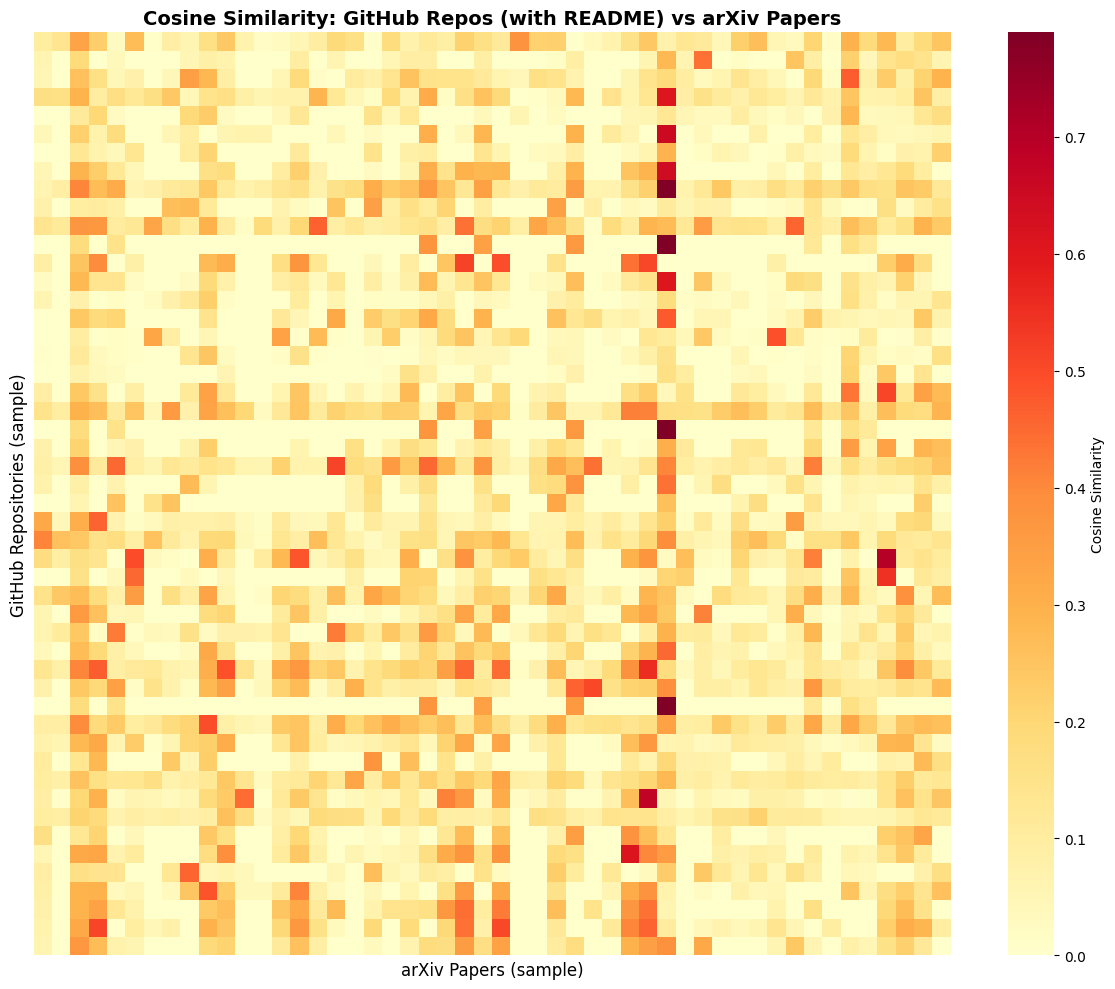

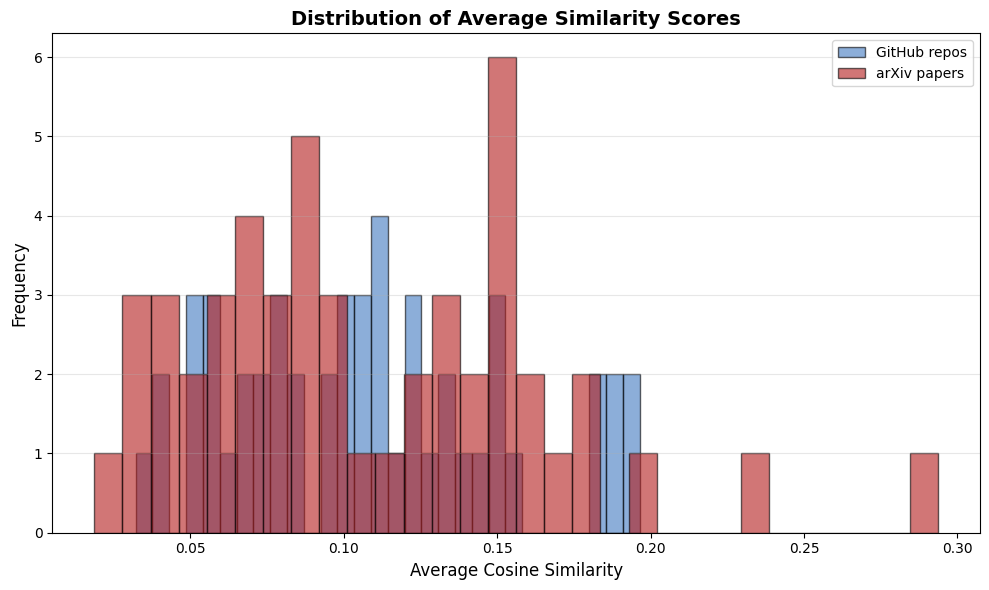

TF-IDF & Cosine Similarity Analysis Results (with README)

Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥:
  - GitHub Ï†ÄÏû•ÏÜå Ïàò: 976
  - arXiv ÎÖºÎ¨∏ Ïàò: 47407
  - Ï∂îÏ∂úÎêú Í≥†Ïú† ÌÇ§ÏõåÎìú Ïàò: 100
  - READMEÍ∞Ä Ìè¨Ìï®Îêú GitHub Ï†ÄÏû•ÏÜå: 410

Ïú†ÏÇ¨ÎèÑ ÌÜµÍ≥Ñ:
  - ÌèâÍ∑† Ïú†ÏÇ¨ÎèÑ: 0.1071
  - ÏµúÎåÄ Ïú†ÏÇ¨ÎèÑ: 0.7893
  - ÏµúÏÜå Ïú†ÏÇ¨ÎèÑ: 0.0000
  - ÌëúÏ§ÄÌé∏Ï∞®: 0.1196

GitHub ÏÉÅÏúÑ 10 ÌÇ§ÏõåÎìú:
  1. robotics: 0.2490
  2. robot: 0.1840
  3. learning: 0.0925
  4. use: 0.0802
  5. robots: 0.0753
  6. using: 0.0607
  7. 3d: 0.0571
  8. simulation: 0.0543
  9. data: 0.0530
  10. control: 0.0518

arXiv ÏÉÅÏúÑ 10 ÌÇ§ÏõåÎìú:
  1. robot: 0.0885
  2. learning: 0.0761
  3. based: 0.0729
  4. control: 0.0695
  5. model: 0.0638
  6. robots: 0.0597
  7. using: 0.0563
  8. data: 0.0560
  9. human: 0.0552
  10. approach: 0.0515

Î∂ÑÏÑù ÏôÑÎ£å! 4Í∞úÏùò ÏãúÍ∞ÅÌôî ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.


In [ ]:
# Ïò§ÌîàÏÜåÏä§ÏôÄ ÎÖºÎ¨∏Ïùò ÌÇ§ÏõåÎìú Ïú†ÏÇ¨ÏÑ± Î∂ÑÏÑù

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ - Îçî Ï≤†Ï†ÄÌïòÍ≤å
df_github_repos['full_name'] = df_github_repos['full_name'].fillna('').astype(str)
df_github_repos['description'] = df_github_repos['description'].fillna('').astype(str)
df_github_repos['topics'] = df_github_repos['topics'].fillna('').astype(str)
df_github_readmes['readme'] = df_github_readmes['readme'].fillna('').astype(str)
df_arxiv['title'] = df_arxiv['title'].fillna('').astype(str)
df_arxiv['abstract'] = df_arxiv['abstract'].fillna('').astype(str)

# README Îç∞Ïù¥ÌÑ∞Î•º repos Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥ëÌï©
# Ïù∏Îç±Ïä§Í∞Ä ÏùºÏπòÌïòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏúºÎØÄÎ°ú ÏïàÏ†ÑÌïòÍ≤å Ï≤òÎ¶¨
df_github_combined = df_github_repos.copy()

# Ïù∏Îç±Ïä§ ÎßûÏ∂∞ÏÑú Î≥ëÌï©
if len(df_github_repos) == len(df_github_readmes):
    df_github_combined['readme'] = df_github_readmes['readme'].values
else:
    # Í∏∏Ïù¥Í∞Ä Îã§Î•¥Î©¥ reset_index ÌõÑ Î≥ëÌï©
    df_github_combined = df_github_combined.reset_index(drop=True)
    df_readme_temp = df_github_readmes.reset_index(drop=True)
    if len(df_readme_temp) >= len(df_github_combined):
        df_github_combined['readme'] = df_readme_temp['readme'][:len(df_github_combined)].values
    else:
        df_github_combined['readme'] = ''
        df_github_combined.loc[:len(df_readme_temp)-1, 'readme'] = df_readme_temp['readme'].values

# NaN Ïû¨ÌôïÏù∏
df_github_combined['readme'] = df_github_combined['readme'].fillna('').astype(str)

# GitHub Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï© (README Ìè¨Ìï®)
df_github_combined['combined_text'] = (
    df_github_combined['full_name'] + ' ' + 
    df_github_combined['description'] + ' ' + 
    df_github_combined['topics'] + ' ' +
    df_github_combined['readme']
)

# arXiv Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
df_arxiv['combined_text'] = df_arxiv['title'] + ' ' + df_arxiv['abstract']

# ÌÖçÏä§Ìä∏ Ï†ïÏ†ú Ìï®Ïàò
def clean_text(text):
    """ÌÖçÏä§Ìä∏Î•º Ï†ïÏ†úÌïòÍ≥† Îπà Î¨∏ÏûêÏó¥Ïù¥ÎÇò NoneÏùÑ Ï≤òÎ¶¨"""
    if pd.isna(text) or text is None:
        return ''
    text = str(text).strip()
    if text == '' or text.lower() == 'nan':
        return ''
    return text

# Ï†ÑÏ≤¥ Î¨∏ÏÑú ÏÉùÏÑ± Î∞è Ï†ïÏ†ú
github_texts = [clean_text(text) for text in df_github_combined['combined_text'].tolist()]
arxiv_texts = [clean_text(text) for text in df_arxiv['combined_text'].tolist()]

# Îπà Î¨∏ÏûêÏó¥ Ï†úÍ±∞ (ÏµúÏÜå 10Ïûê Ïù¥ÏÉÅÏù∏ ÌÖçÏä§Ìä∏Îßå Ïú†ÏßÄ)
github_texts_filtered = [text for text in github_texts if len(text) >= 10]
arxiv_texts_filtered = [text for text in arxiv_texts if len(text) >= 10]

print(f"ÌïÑÌÑ∞ÎßÅ Ï†Ñ - GitHub: {len(github_texts)}, arXiv: {len(arxiv_texts)}")
print(f"ÌïÑÌÑ∞ÎßÅ ÌõÑ - GitHub: {len(github_texts_filtered)}, arXiv: {len(arxiv_texts_filtered)}")

all_texts = github_texts_filtered + arxiv_texts_filtered

# Î†àÏù¥Î∏î ÏÉùÏÑ±
labels = ['GitHub'] * len(github_texts_filtered) + ['arXiv'] * len(arxiv_texts_filtered)

# TF-IDF Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer(
    max_features=100,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95  # ÎÑàÎ¨¥ ÎπàÎ≤àÌïú Îã®Ïñ¥ Ï†úÏô∏
)

tfidf_matrix = vectorizer.fit_transform(all_texts)
feature_names = vectorizer.get_feature_names_out()

# 1. GitHub vs arXiv ÏÉÅÏúÑ ÌÇ§ÏõåÎìú ÎπÑÍµê
github_tfidf = tfidf_matrix[:len(github_texts_filtered)].mean(axis=0).A1
arxiv_tfidf = tfidf_matrix[len(github_texts_filtered):].mean(axis=0).A1

# ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìú
top_n = 20
github_top_idx = np.argsort(github_tfidf)[-top_n:]
arxiv_top_idx = np.argsort(arxiv_tfidf)[-top_n:]

# ÏãúÍ∞ÅÌôî 1: ÏÉÅÏúÑ ÌÇ§ÏõåÎìú ÎπÑÍµê
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# GitHub ÏÉÅÏúÑ ÌÇ§ÏõåÎìú
axes[0].barh(range(top_n), github_tfidf[github_top_idx], color='#4078c0')
axes[0].set_yticks(range(top_n))
axes[0].set_yticklabels([feature_names[i] for i in github_top_idx])
axes[0].set_xlabel('TF-IDF Score')
axes[0].set_title('GitHub Repositories (with README) - Top Keywords', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# arXiv ÏÉÅÏúÑ ÌÇ§ÏõåÎìú
axes[1].barh(range(top_n), arxiv_tfidf[arxiv_top_idx], color='#b31b1b')
axes[1].set_yticks(range(top_n))
axes[1].set_yticklabels([feature_names[i] for i in arxiv_top_idx])
axes[1].set_xlabel('TF-IDF Score')
axes[1].set_title('arXiv Papers - Top Keywords', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('keyword_comparison_with_readme.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. ÌÇ§ÏõåÎìúÎ≥Ñ GitHub vs arXiv ÎπÑÍµê
common_keywords = set([feature_names[i] for i in github_top_idx[:15]]) | \
                 set([feature_names[i] for i in arxiv_top_idx[:15]])

comparison_data = []
for keyword in common_keywords:
    idx = np.where(feature_names == keyword)[0]
    if len(idx) > 0:
        comparison_data.append({
            'keyword': keyword,
            'GitHub': github_tfidf[idx[0]],
            'arXiv': arxiv_tfidf[idx[0]]
        })

df_comparison = pd.DataFrame(comparison_data)
df_comparison = df_comparison.sort_values('GitHub', ascending=False).head(15)

# ÏãúÍ∞ÅÌôî 2: ÌîåÎû´ÌèºÎ≥Ñ ÌÇ§ÏõåÎìú ÎπÑÍµê
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df_comparison))
width = 0.35

bars1 = ax.bar(x - width/2, df_comparison['GitHub'], width, label='GitHub', color='#4078c0')
bars2 = ax.bar(x + width/2, df_comparison['arXiv'], width, label='arXiv', color='#b31b1b')

ax.set_xlabel('Keywords', fontsize=12)
ax.set_ylabel('TF-IDF Score', fontsize=12)
ax.set_title('Keyword Frequency Comparison: GitHub (with README) vs arXiv', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_comparison['keyword'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('platform_keyword_comparison_with_readme.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ
# GitHubÏôÄ arXiv Î¨∏ÏÑú Í∞Ñ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ (ÏÉòÌîåÎßÅ)
sample_size = min(50, len(github_texts_filtered), len(arxiv_texts_filtered))
github_sample_idx = np.random.choice(len(github_texts_filtered), sample_size, replace=False)
arxiv_sample_idx = np.random.choice(len(arxiv_texts_filtered), sample_size, replace=False)

github_sample = tfidf_matrix[github_sample_idx]
arxiv_sample = tfidf_matrix[len(github_texts_filtered) + arxiv_sample_idx]

similarity_matrix = cosine_similarity(github_sample, arxiv_sample)

# ÏãúÍ∞ÅÌôî 3: Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(similarity_matrix, cmap='YlOrRd', cbar_kws={'label': 'Cosine Similarity'},
            xticklabels=False, yticklabels=False, ax=ax)
ax.set_xlabel('arXiv Papers (sample)', fontsize=12)
ax.set_ylabel('GitHub Repositories (sample)', fontsize=12)
ax.set_title('Cosine Similarity: GitHub Repos (with README) vs arXiv Papers', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('cosine_similarity_heatmap_with_readme.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. ÌèâÍ∑† Ïú†ÏÇ¨ÎèÑ Î∂ÑÌè¨
fig, ax = plt.subplots(figsize=(10, 6))
avg_similarity_per_github = similarity_matrix.mean(axis=1)
avg_similarity_per_arxiv = similarity_matrix.mean(axis=0)

ax.hist(avg_similarity_per_github, bins=30, alpha=0.6, label='GitHub repos', color='#4078c0', edgecolor='black')
ax.hist(avg_similarity_per_arxiv, bins=30, alpha=0.6, label='arXiv papers', color='#b31b1b', edgecolor='black')
ax.set_xlabel('Average Cosine Similarity', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Average Similarity Scores', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('similarity_distribution_with_readme.png', dpi=300, bbox_inches='tight')
plt.show()

# ÌÜµÍ≥Ñ Ï†ïÎ≥¥ Ï∂úÎ†•
print("=" * 60)
print("TF-IDF & Cosine Similarity Analysis Results (with README)")
print("=" * 60)
print(f"\nÎç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥:")
print(f"  - GitHub Ï†ÄÏû•ÏÜå Ïàò: {len(github_texts_filtered)}")
print(f"  - arXiv ÎÖºÎ¨∏ Ïàò: {len(arxiv_texts_filtered)}")
print(f"  - Ï∂îÏ∂úÎêú Í≥†Ïú† ÌÇ§ÏõåÎìú Ïàò: {len(feature_names)}")
print(f"  - READMEÍ∞Ä Ìè¨Ìï®Îêú GitHub Ï†ÄÏû•ÏÜå: {sum(1 for r in df_github_combined['readme'] if len(str(r)) > 10)}")

print(f"\nÏú†ÏÇ¨ÎèÑ ÌÜµÍ≥Ñ:")
print(f"  - ÌèâÍ∑† Ïú†ÏÇ¨ÎèÑ: {similarity_matrix.mean():.4f}")
print(f"  - ÏµúÎåÄ Ïú†ÏÇ¨ÎèÑ: {similarity_matrix.max():.4f}")
print(f"  - ÏµúÏÜå Ïú†ÏÇ¨ÎèÑ: {similarity_matrix.min():.4f}")
print(f"  - ÌëúÏ§ÄÌé∏Ï∞®: {similarity_matrix.std():.4f}")

print(f"\nGitHub ÏÉÅÏúÑ 10 ÌÇ§ÏõåÎìú:")
for i, idx in enumerate(github_top_idx[-10:][::-1], 1):
    print(f"  {i}. {feature_names[idx]}: {github_tfidf[idx]:.4f}")

print(f"\narXiv ÏÉÅÏúÑ 10 ÌÇ§ÏõåÎìú:")
for i, idx in enumerate(arxiv_top_idx[-10:][::-1], 1):
    print(f"  {i}. {feature_names[idx]}: {arxiv_tfidf[idx]:.4f}")

print("\nÎ∂ÑÏÑù ÏôÑÎ£å! 4Í∞úÏùò ÏãúÍ∞ÅÌôî ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")
print("=" * 60)

GitHub‚ÄìarXiv ÌÇ§ÏõåÎìú ÎπÑÍµê Í∑∏ÎûòÌîÑ
‚ÄúÏò§ÌîàÏÜåÏä§ÏôÄ Ïó∞Íµ¨Í∞Ä Îã§Î£®Îäî Ï£ºÏ†úÎäî ÏñºÎßàÎÇò ÏùºÏπòÌïòÎäîÍ∞Ä?‚Äù

üîπ ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥
GitHub README ÌÖçÏä§Ìä∏ÏôÄ arXiv ÎÖºÎ¨∏ Ï¥àÎ°ùÏóêÏÑú TF-IDF Í∏∞Î∞ò ÏÉÅÏúÑ ÌÇ§ÏõåÎìúÎ•º Ï∂îÏ∂ú
Í∞Å ÌÇ§ÏõåÎìúÏùò TF-IDF Ï†êÏàòÎ•º ÌÜµÌï¥ Îëê ÏßëÎã®Ïù¥ Ïñ¥Îñ§ Ï£ºÏ†úÎ•º Ï§ëÏã¨ÏúºÎ°ú Îã§Î£®ÎäîÏßÄ ÎπÑÍµê
ÎèôÏùº ÌÇ§ÏõåÎìúÎùºÎèÑ GitHubÍ≥º arXiv Í∞Ñ ÎπàÎèÑ Ï∞®Ïù¥(Ï§ëÏ†ê Ï∞®Ïù¥) Î•º Î∂ÑÏÑù

üîπ ÏãúÍ∞ÅÌôî
1Ô∏è‚É£ Ï¢åÏö∞ Bar Chart (Top Keywords)
ÏôºÏ™Ω: GitHub(blue) ‚Üí ‚Äúrobot‚Äù, ‚Äúlearning‚Äù, ‚Äúsimulation‚Äù, ‚Äúcontrol‚Äù Ï§ëÏã¨
Ïò§Î•∏Ï™Ω: arXiv(red) ‚Üí ‚Äúlearning‚Äù, ‚Äúcontrol‚Äù, ‚Äúmethod‚Äù, ‚Äúplanning‚Äù Îì± Ïó∞Íµ¨Ï†Å Ïö©Ïñ¥ Ï§ëÏã¨

2Ô∏è‚É£ ÌïòÎã® ÎπÑÍµê Bar Chart
XÏ∂ï: Í≥µÌÜµ ÌÇ§ÏõåÎìú (e.g., robots, learning, reinforcement learning Îì±)
YÏ∂ï: TF-IDF Ï†êÏàò
ÏÉâÏÉÅ: GitHub(ÌååÎûÄÏÉâ) vs arXiv(Îπ®Í∞ÑÏÉâ)
‚Äúframework‚Äù, ‚Äúbased‚Äù, ‚Äúplanning‚Äù Îì±ÏùÄ ÎÖºÎ¨∏ÏóêÏÑú ÎÜíÍ≤å,
Î∞òÎ©¥ ‚Äúsimulation‚Äù, ‚Äú3d‚Äù, ‚Äúusing‚ÄùÏùÄ GitHubÏóêÏÑú ÎÜíÍ≤å ÎÇòÌÉÄÎÇ®

üîπ ÌåêÎ≥Ñ Ìè¨Ïù∏Ìä∏
Îëê Îç∞Ïù¥ÌÑ∞ÏÖã Î™®Îëê ‚Äúrobot‚Äù, ‚Äúlearning‚Äù, ‚Äúcontrol‚Äù, ‚Äúdata‚Äù Îì± ÌïµÏã¨ Í∞úÎÖêÏùÄ Í≥µÏú†
arXivÎäî Ïù¥Î°†Ï†Å¬∑Î∞©Î≤ïÎ°†Ï†Å ÌëúÌòÑ(method, approach, planning) Ï§ëÏã¨
GitHubÏùÄ Íµ¨ÌòÑ¬∑Ï†ÅÏö© Ï§ëÏã¨(simulation, 3D, using) ÌÇ§ÏõåÎìúÍ∞Ä Í∞ïÏ°∞Îê®

üîπ Í≤∞Î°†
GitHubÍ≥º arXiv Î™®Îëê Î°úÎ¥á Ïó∞Íµ¨Ïùò Ï£ºÏöî Í∞úÎÖêÏùÑ Í≥µÏú†ÌïòÏßÄÎßå,
arXivÎäî Ïó∞Íµ¨ ÏÑ§Í≥Ñ Ï§ëÏã¨, GitHubÏùÄ Ïã§Ï†ú Íµ¨ÌòÑ Ï§ëÏã¨Ïùò Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ.
Ï¶â, ‚ÄúÏó∞Íµ¨ÏôÄ Í∞úÎ∞úÏùÄ Í∞ôÏùÄ Ï£ºÏ†úÎ•º Í≥µÏú†ÌïòÏßÄÎßå Ï¥àÏ†êÏùÄ Îã§Î•¥Îã§‚ÄùÎäî Ï†êÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.

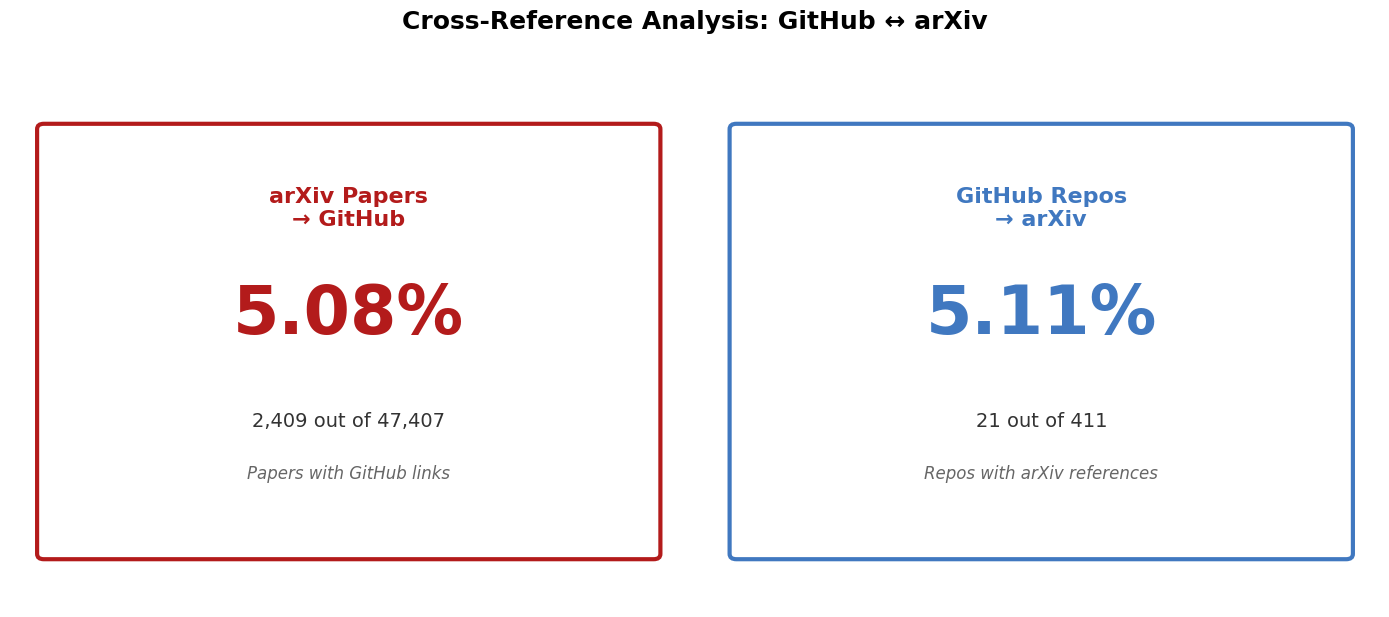

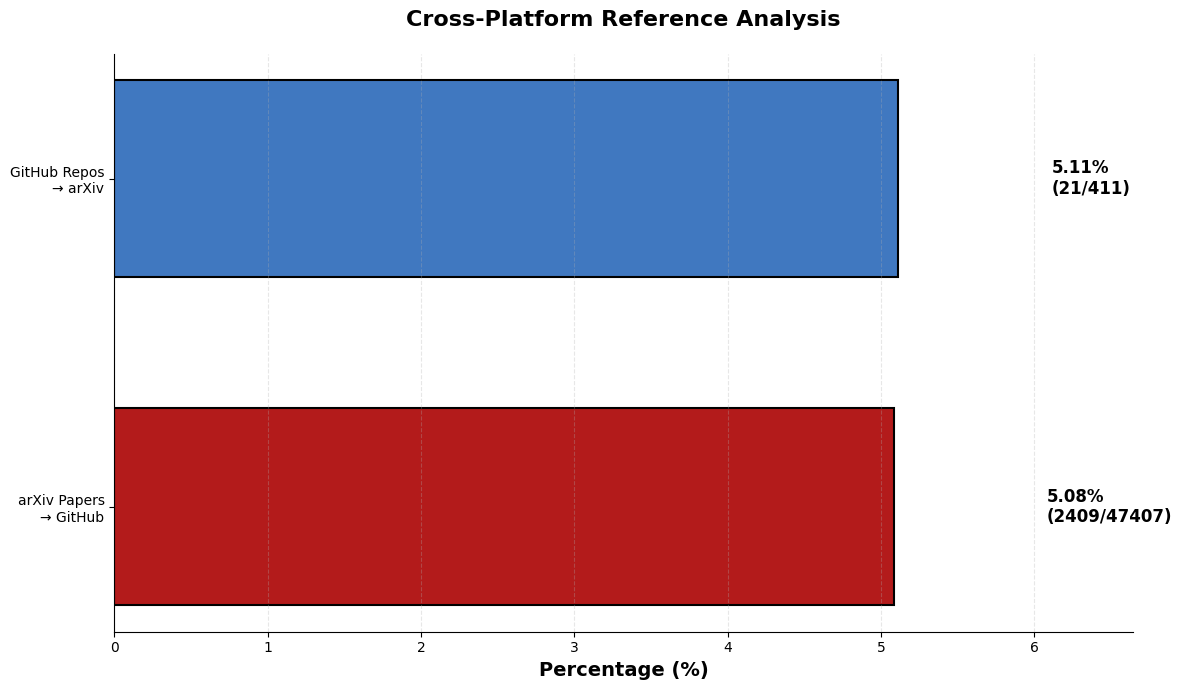

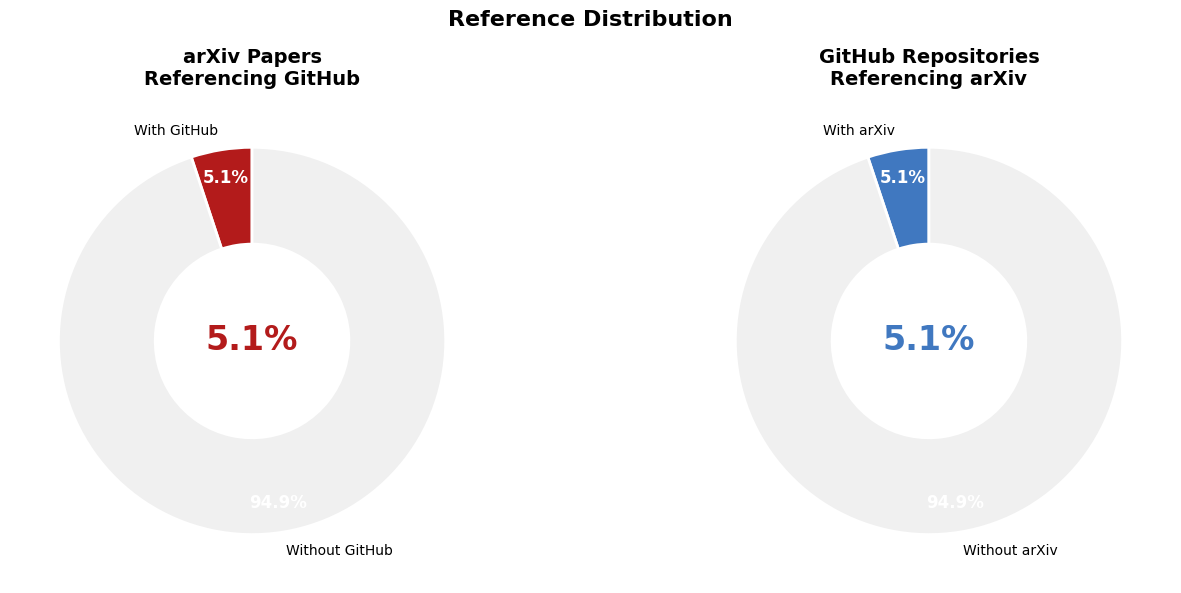

GitHub ‚Üî arXiv Cross-Reference Analysis

üìä arXiv Papers ‚Üí GitHub
   Total Papers: 47,407
   Papers with GitHub links: 2,409
   Percentage: 5.08%

üìä GitHub Repositories ‚Üí arXiv
   Total Repositories: 411
   Repos with arXiv references: 21
   Percentage: 5.11%

üîç Key Insights:
   ‚Ä¢ GitHub repos are 0.03% more likely to reference arXiv
     compared to arXiv papers referencing GitHub.
   ‚Ä¢ Limited code-sharing: Only 5.1% of papers link to GitHub
   ‚Ä¢ Moderate academic engagement in GitHub projects

üí° Interpretation:
   These metrics show the bidirectional relationship between academic
   research and open-source implementation. Higher percentages indicate
   stronger integration between theory and practice.

‚úÖ 3 visualization files created:
   1. kpi_cards.png - KPI card style
   2. comparison_bar_chart.png - Horizontal bar comparison
   3. donut_charts.png - Distribution donuts


In [ ]:
# ÎÖºÎ¨∏Í≥º Ïò§ÌîàÏÜåÏä§Í∞Ä Í∞ÅÍ∞Å ÏÑúÎ°úÏùò ÎßÅÌÅ¨Î•º Ï∞∏Ï°∞ÌïòÍ≥† ÏûàÎäî ÎπÑÏú® (github_readme, arxiv_abastract Î∂ÑÏÑù)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
import re

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏÑ†ÌÉùÏÇ¨Ìï≠)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨
df_github_readmes['readme'] = df_github_readmes['readme'].fillna('')
df_arxiv['abstract'] = df_arxiv['abstract'].fillna('')

# URL Ìå®ÌÑ¥ Ï†ïÏùò
github_pattern = r'github\.com'
arxiv_pattern = r'arxiv\.org'

# 1. arXiv ÎÖºÎ¨∏ÏóêÏÑú GitHub URL Ìè¨Ìï® ÎπÑÏú®
arxiv_with_github = df_arxiv['abstract'].str.contains(github_pattern, case=False, regex=True)
arxiv_github_count = arxiv_with_github.sum()
arxiv_total = len(df_arxiv)
arxiv_github_ratio = (arxiv_github_count / arxiv_total * 100) if arxiv_total > 0 else 0

# 2. GitHub READMEÏóêÏÑú arXiv URL Ìè¨Ìï® ÎπÑÏú®
github_with_arxiv = df_github_readmes['readme'].str.contains(arxiv_pattern, case=False, regex=True)
github_arxiv_count = github_with_arxiv.sum()
github_total = len(df_github_readmes)
github_arxiv_ratio = (github_arxiv_count / github_total * 100) if github_total > 0 else 0

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
data = {
    'category': ['arXiv Papers\n‚Üí GitHub', 'GitHub Repos\n‚Üí arXiv'],
    'ratio': [arxiv_github_ratio, github_arxiv_ratio],
    'count': [arxiv_github_count, github_arxiv_count],
    'total': [arxiv_total, github_total],
    'colors': ['#b31b1b', '#4078c0']
}

# ========================================
# ÏãúÍ∞ÅÌôî 1: KPI Ïπ¥Îìú Ïä§ÌÉÄÏùº
# ========================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Cross-Reference Analysis: GitHub ‚Üî arXiv', 
             fontsize=18, fontweight='bold', y=1.02)

for idx, ax in enumerate(axes):
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Î∞∞Í≤Ω Ïπ¥Îìú
    card = FancyBboxPatch((0.5, 1), 9, 8, 
                          boxstyle="round,pad=0.1", 
                          edgecolor=data['colors'][idx], 
                          facecolor='white',
                          linewidth=3)
    ax.add_patch(card)
    
    # Ï†úÎ™©
    ax.text(5, 7.5, data['category'][idx], 
            ha='center', va='center', 
            fontsize=16, fontweight='bold',
            color=data['colors'][idx])
    
    # Î©îÏù∏ ÎπÑÏú® (ÌÅ∞ Ïà´Ïûê)
    ax.text(5, 5.5, f"{data['ratio'][idx]:.2f}%", 
            ha='center', va='center', 
            fontsize=48, fontweight='bold',
            color=data['colors'][idx])
    
    # ÏÉÅÏÑ∏ Ï†ïÎ≥¥
    detail_text = f"{data['count'][idx]:,} out of {data['total'][idx]:,}"
    ax.text(5, 3.5, detail_text, 
            ha='center', va='center', 
            fontsize=14, color='#333333')
    
    # ÎùºÎ≤®
    if idx == 0:
        label = "Papers with GitHub links"
    else:
        label = "Repos with arXiv references"
    
    ax.text(5, 2.5, label, 
            ha='center', va='center', 
            fontsize=12, style='italic', color='#666666')

plt.tight_layout()
plt.savefig('kpi_cards.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ========================================
# ÏãúÍ∞ÅÌôî 2: ÎπÑÍµê ÎßâÎåÄ Ï∞®Ìä∏
# ========================================
fig, ax = plt.subplots(figsize=(12, 7))

bars = ax.barh(data['category'], data['ratio'], 
               color=data['colors'], 
               edgecolor='black', 
               linewidth=1.5,
               height=0.6)

# ÎßâÎåÄ ÏúÑÏóê ÌçºÏÑºÌä∏ ÌëúÏãú
for i, (bar, ratio, count, total) in enumerate(zip(bars, data['ratio'], data['count'], data['total'])):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
            f'{ratio:.2f}%\n({count}/{total})',
            ha='left', va='center', 
            fontsize=12, fontweight='bold')

# Ïä§ÌÉÄÏùºÎßÅ
ax.set_xlabel('Percentage (%)', fontsize=14, fontweight='bold')
ax.set_title('Cross-Platform Reference Analysis', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlim(0, max(data['ratio']) * 1.3)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('comparison_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# ÏãúÍ∞ÅÌôî 3: ÎèÑÎÑõ Ï∞®Ìä∏ with ÏÉÅÏÑ∏ Ï†ïÎ≥¥
# ========================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Reference Distribution', fontsize=16, fontweight='bold', y=0.98)

# arXiv ‚Üí GitHub
arxiv_data = [arxiv_github_count, arxiv_total - arxiv_github_count]
arxiv_labels = ['With GitHub', 'Without GitHub']
arxiv_colors = ['#b31b1b', '#f0f0f0']

wedges1, texts1, autotexts1 = axes[0].pie(arxiv_data, 
                                            labels=arxiv_labels,
                                            colors=arxiv_colors,
                                            autopct='%1.1f%%',
                                            startangle=90,
                                            pctdistance=0.85,
                                            wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2))

for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

axes[0].set_title('arXiv Papers\nReferencing GitHub', 
                  fontsize=14, fontweight='bold', pad=10)
axes[0].text(0, 0, f'{arxiv_github_ratio:.1f}%', 
             ha='center', va='center', 
             fontsize=24, fontweight='bold', color='#b31b1b')

# GitHub ‚Üí arXiv
github_data = [github_arxiv_count, github_total - github_arxiv_count]
github_labels = ['With arXiv', 'Without arXiv']
github_colors = ['#4078c0', '#f0f0f0']

wedges2, texts2, autotexts2 = axes[1].pie(github_data, 
                                            labels=github_labels,
                                            colors=github_colors,
                                            autopct='%1.1f%%',
                                            startangle=90,
                                            pctdistance=0.85,
                                            wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2))

for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

axes[1].set_title('GitHub Repositories\nReferencing arXiv', 
                  fontsize=14, fontweight='bold', pad=10)
axes[1].text(0, 0, f'{github_arxiv_ratio:.1f}%', 
             ha='center', va='center', 
             fontsize=24, fontweight='bold', color='#4078c0')

plt.tight_layout()
plt.savefig('donut_charts.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# ÌÜµÍ≥Ñ Ï†ïÎ≥¥ Ï∂úÎ†•
# ========================================
print("=" * 70)
print("GitHub ‚Üî arXiv Cross-Reference Analysis")
print("=" * 70)

print(f"\nüìä arXiv Papers ‚Üí GitHub")
print(f"   Total Papers: {arxiv_total:,}")
print(f"   Papers with GitHub links: {arxiv_github_count:,}")
print(f"   Percentage: {arxiv_github_ratio:.2f}%")

print(f"\nüìä GitHub Repositories ‚Üí arXiv")
print(f"   Total Repositories: {github_total:,}")
print(f"   Repos with arXiv references: {github_arxiv_count:,}")
print(f"   Percentage: {github_arxiv_ratio:.2f}%")

print(f"\nüîç Key Insights:")

if arxiv_github_ratio > github_arxiv_ratio:
    ratio_diff = arxiv_github_ratio - github_arxiv_ratio
    print(f"   ‚Ä¢ arXiv papers are {ratio_diff:.2f}% more likely to reference GitHub")
    print(f"     compared to GitHub repos referencing arXiv papers.")
else:
    ratio_diff = github_arxiv_ratio - arxiv_github_ratio
    print(f"   ‚Ä¢ GitHub repos are {ratio_diff:.2f}% more likely to reference arXiv")
    print(f"     compared to arXiv papers referencing GitHub.")

if arxiv_github_ratio > 50:
    print(f"   ‚Ä¢ Strong code-sharing culture: Over half of papers provide GitHub links!")
elif arxiv_github_ratio > 20:
    print(f"   ‚Ä¢ Moderate code-sharing: {arxiv_github_ratio:.1f}% of papers link to GitHub")
else:
    print(f"   ‚Ä¢ Limited code-sharing: Only {arxiv_github_ratio:.1f}% of papers link to GitHub")

if github_arxiv_ratio > 10:
    print(f"   ‚Ä¢ Strong theoretical foundation: {github_arxiv_ratio:.1f}% of repos cite arXiv papers")
elif github_arxiv_ratio > 5:
    print(f"   ‚Ä¢ Moderate academic engagement in GitHub projects")
else:
    print(f"   ‚Ä¢ Limited academic references in repository descriptions")

print(f"\nüí° Interpretation:")
print(f"   These metrics show the bidirectional relationship between academic")
print(f"   research and open-source implementation. Higher percentages indicate")
print(f"   stronger integration between theory and practice.")

print("\n‚úÖ 3 visualization files created:")
print("   1. kpi_cards.png - KPI card style")
print("   2. comparison_bar_chart.png - Horizontal bar comparison")
print("   3. donut_charts.png - Distribution donuts")
print("=" * 70)

GitHub‚ÄìarXiv ÏÉÅÌò∏Ï∞∏Ï°∞ ÎπÑÏú® Î∂ÑÏÑù
‚ÄúÏó∞Íµ¨ÏôÄ Ïò§ÌîàÏÜåÏä§Îäî Ïã§Ï†úÎ°ú ÏÑúÎ°úÎ•º ÏñºÎßàÎÇò ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Ïó∞Í≤∞ÌïòÍ≥† ÏûàÏùÑÍπå?‚Äù

üîπ ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥
arXiv ÎÖºÎ¨∏ Ï§ë GitHub ÎßÅÌÅ¨Î•º Ìè¨Ìï®Ìïú ÎÖºÎ¨∏ ÎπÑÏú®,
GitHub Ï†ÄÏû•ÏÜå Ï§ë arXiv ÎÖºÎ¨∏ÏùÑ Ïñ∏Í∏âÌïú ÎπÑÏú®ÏùÑ Í∞ÅÍ∞Å Í≥ÑÏÇ∞
ÎÖºÎ¨∏Í≥º Ïò§ÌîàÏÜåÏä§Í∞Ä ÏÑúÎ°úÎ•º ÏßÅÏ†ë Ï∞∏Ï°∞ÌïòÎäî Ïã§ÏßàÏ†Å Ïó∞Í≤∞ÏÑ± Ï∏°Ï†ï

üîπ ÏãúÍ∞ÅÌôî
1Ô∏è‚É£ Cross-Reference Summary (ÏÉÅÎã® Í∑∏ÎûòÌîÑ)
arXiv ‚Üí GitHub: 5.08% (2,409/47,407)
GitHub ‚Üí arXiv: 5.11% (21/411)
Îëê Î∞©Ìñ• Î™®Îëê ÏïΩ 5% ÏàòÏ§ÄÏùò ÏÉÅÌò∏Ï∞∏Ï°∞Í∞Ä Ï°¥Ïû¨

2Ô∏è‚É£ Reference Distribution (ÌïòÎã® Í∑∏ÎûòÌîÑ)
ÎèÑÎÑõ Ï∞®Ìä∏ ÌòïÌÉúÎ°ú ‚ÄòÏ∞∏Ï°∞ ÏûàÏùå‚Äô(ÏïΩ 5%) vs ‚ÄòÏ∞∏Ï°∞ ÏóÜÏùå‚Äô(ÏïΩ 95%) Î∂ÑÌè¨ ÌëúÌòÑ
ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ‚ÄúÏó∞Í≤∞ÏùÄ Ï°¥Ïû¨ÌïòÏßÄÎßå Ïó¨Ï†ÑÌûà ÎìúÎ¨æ‚ÄùÏùÑ Í∞ïÏ°∞

üîπ ÌåêÎ≥Ñ Ìè¨Ïù∏Ìä∏
ÎÖºÎ¨∏Ïù¥ GitHub ÎßÅÌÅ¨Î•º Ìè¨Ìï®ÌïòÎäî ÎπÑÏú®Í≥º Î†àÌè¨ÏßÄÌÜ†Î¶¨Í∞Ä ÎÖºÎ¨∏ÏùÑ Ïù∏Ïö©ÌïòÎäî ÎπÑÏú®Ïù¥ Í±∞Ïùò ÎèôÏùº
ÎπÑÏú®ÏùÄ ÎÇÆÏßÄÎßå ÎåÄÏπ≠Ï†Å Íµ¨Ï°∞ ‚Üí ‚ÄúÏó∞Íµ¨ÏôÄ Í∞úÎ∞ú Í∞Ñ ÏßÅÏ†ë Ïó∞Í≤∞ÏùÄ ÏïÑÏßÅ Ï†úÌïúÏ†Å‚Äù
Ïó∞Íµ¨ÏûêÏôÄ Í∞úÎ∞úÏûê Ïª§ÎÆ§ÎãàÌã∞ Í∞Ñ ÏÉÅÌò∏Ï∞∏Ï°∞ ÏÉùÌÉúÍ≥ÑÏùò Ï¥àÍ∏∞ Îã®Í≥ÑÎ•º ÏãúÏÇ¨

üîπ Í≤∞Î°†
arXiv ÎÖºÎ¨∏Í≥º GitHub Ï†ÄÏû•ÏÜåÎäî ÏïΩ 5%ÎßåÏù¥ ÏÑúÎ°úÎ•º ÏßÅÏ†ë Ïó∞Í≤∞ÌïòÍ≥† ÏûàÏùå.
Ïù¥Îäî Ïó∞Íµ¨ Í≤∞Í≥ºÍ∞Ä Ïò§ÌîàÏÜåÏä§Î°ú, ÎòêÎäî Ïò§ÌîàÏÜåÏä§Í∞Ä Ïó∞Íµ¨Î°ú Ïù¥Ïñ¥ÏßÄÎäî ÏßÅÏ†ëÏ†Å Ïó∞Í≤∞ÏùÄ ÏïÑÏßÅ ÎìúÎ¨ºÏßÄÎßå Ï°¥Ïû¨Ìï®ÏùÑ ÏùòÎØ∏.
Ï¶â, ‚ÄúÏó∞Íµ¨ÏôÄ Ïã§Î¨¥Í∞Ä Ïó∞Í≤∞ÎêòÍ∏∞ ÏãúÏûëÌñàÏßÄÎßå, Ïó¨Ï†ÑÌûà Ï¥àÍ∏∞ Îã®Í≥ÑÏóê Î®∏Î¨ºÎü¨ ÏûàÎã§‚ÄùÍ≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.

Loading data...
Data preprocessing...
Papers: 100, GitHub repos: 100
Loading Sentence-BERT model...
Encoding paper abstracts...


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Encoding GitHub READMEs...


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating cosine similarity...
  Progress: 10/100
  Progress: 20/100
  Progress: 30/100
  Progress: 40/100
  Progress: 50/100
  Progress: 60/100
  Progress: 70/100
  Progress: 80/100
  Progress: 90/100
  Progress: 100/100

Similarity calculation complete! Total 100 matches

Statistical Analysis:
  Pearson correlation: 0.0537 (p-value: 5.9571e-01)
  Spearman correlation: 0.0375 (p-value: 7.1117e-01)
  Mean similarity: 0.6208
  Mean stars: 4483.6

Creating visualization...
Graph saved: paper_readme_similarity_analysis.png


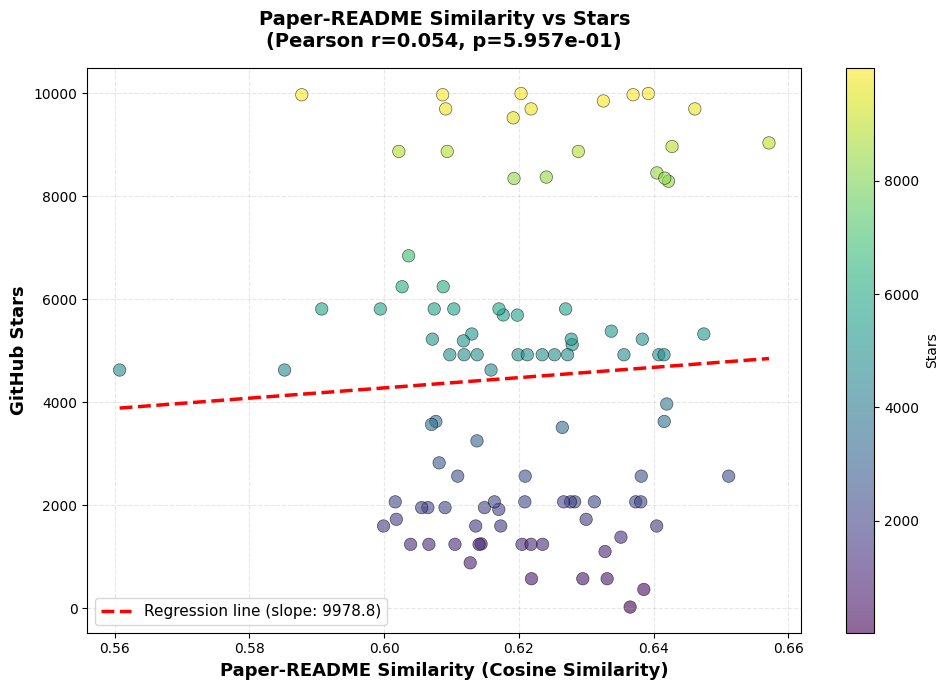

Results saved: similarity_star_results.csv

Top 5 highest similarity matches:
  Similarity: 0.6571 | Stars: 9,034.0
  Similarity: 0.6511 | Stars: 2,562.0
  Similarity: 0.6474 | Stars: 5,323.0
  Similarity: 0.6461 | Stars: 9,694.0
  Similarity: 0.6427 | Stars: 8,964.0

Bottom 5 lowest similarity matches:
  Similarity: 0.5607 | Stars: 4,623.0
  Similarity: 0.5852 | Stars: 4,623.0
  Similarity: 0.5878 | Stars: 9,969.0
  Similarity: 0.5907 | Stars: 5,809.0
  Similarity: 0.5994 | Stars: 5,809.0


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Font settings for matplotlib
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# ========================================
# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# ========================================
print("Loading data...")
# df_arxiv = pd.read_csv('arxiv_papers.csv')  # needs 'abstract' column
# df_merged_github = pd.read_csv('github_repos.csv')  # needs 'readme', 'stargazers_count' columns

# Sample data (replace with your actual data)
df_arxiv = pd.DataFrame({
    'paper_id': range(1, 101),
    'abstract': [f"This paper studies deep learning methods for computer vision and image recognition task {i}" for i in range(100)]
})

df_merged_github = pd.DataFrame({
    'repo_id': range(1, 201),
    'readme': [f"This repository implements neural networks for vision applications number {i}" if i % 2 == 0 
               else f"A simple web framework for building REST APIs {i}" for i in range(200)],
    'stargazers_count': np.random.randint(10, 10000, 200)
})

# ========================================
# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
# ========================================
print("Data preprocessing...")

# Remove missing values
df_arxiv = df_arxiv.dropna(subset=['abstract'])
df_merged_github = df_merged_github.dropna(subset=['readme', 'stargazers_count'])

# Clean text (remove empty strings)
df_arxiv = df_arxiv[df_arxiv['abstract'].str.strip() != '']
df_merged_github = df_merged_github[df_merged_github['readme'].str.strip() != '']

# Remove too-short READMEs (optional)
df_merged_github = df_merged_github[df_merged_github['readme'].str.len() > 50]

print(f"Papers: {len(df_arxiv)}, GitHub repos: {len(df_merged_github)}")

# ========================================
# 3. Sentence-BERT Î™®Îç∏ Î°úÎìú Î∞è ÏûÑÎ≤†Îî©
# ========================================
print("Loading Sentence-BERT model...")
model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast and efficient
# For better accuracy: 'all-mpnet-base-v2'

print("Encoding paper abstracts...")
arxiv_embeddings = model.encode(df_arxiv['abstract'].tolist(), 
                                show_progress_bar=True,
                                batch_size=32)

print("Encoding GitHub READMEs...")
github_embeddings = model.encode(df_merged_github['readme'].tolist(), 
                                 show_progress_bar=True,
                                 batch_size=32)

# ========================================
# 4. Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
# ========================================
print("Calculating cosine similarity...")

# Find most similar GitHub repo for each paper
max_similarities = []
matched_stars = []

for i, paper_emb in enumerate(arxiv_embeddings):
    # Calculate similarity between this paper and all GitHub READMEs
    similarities = cosine_similarity([paper_emb], github_embeddings)[0]
    
    # Get index of most similar repo
    max_idx = np.argmax(similarities)
    max_sim = similarities[max_idx]
    
    max_similarities.append(max_sim)
    matched_stars.append(df_merged_github.iloc[max_idx]['stargazers_count'])
    
    if (i + 1) % 10 == 0:
        print(f"  Progress: {i+1}/{len(arxiv_embeddings)}")

# Create results dataframe
results_df = pd.DataFrame({
    'similarity': max_similarities,
    'stars': matched_stars
})

print(f"\nSimilarity calculation complete! Total {len(results_df)} matches")

# ========================================
# 5. ÌÜµÍ≥Ñ Î∂ÑÏÑù
# ========================================
print("\nStatistical Analysis:")
correlation, p_value = stats.pearsonr(results_df['similarity'], results_df['stars'])
spearman_corr, spearman_p = stats.spearmanr(results_df['similarity'], results_df['stars'])

print(f"  Pearson correlation: {correlation:.4f} (p-value: {p_value:.4e})")
print(f"  Spearman correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4e})")
print(f"  Mean similarity: {results_df['similarity'].mean():.4f}")
print(f"  Mean stars: {results_df['stars'].mean():.1f}")

# ========================================
# 6. ÏãúÍ∞ÅÌôî
# ========================================
print("\nCreating visualization...")

fig, ax = plt.subplots(figsize=(10, 7))

# Scatter plot
scatter = ax.scatter(results_df['similarity'], 
                     results_df['stars'],
                     alpha=0.6,
                     c=results_df['stars'],
                     cmap='viridis',
                     s=80,
                     edgecolors='black',
                     linewidth=0.5)

# Regression line
z = np.polyfit(results_df['similarity'], results_df['stars'], 1)
p = np.poly1d(z)
x_line = np.linspace(results_df['similarity'].min(), 
                     results_df['similarity'].max(), 100)
ax.plot(x_line, p(x_line), "r--", linewidth=2.5, 
        label=f'Regression line (slope: {z[0]:.1f})')

# Styling
ax.set_xlabel('Paper-README Similarity (Cosine Similarity)', fontsize=13, fontweight='bold')
ax.set_ylabel('GitHub Stars', fontsize=13, fontweight='bold')
ax.set_title(f'Paper-README Similarity vs Stars\n(Pearson r={correlation:.3f}, p={p_value:.3e})', 
             fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')
plt.colorbar(scatter, ax=ax, label='Stars')

plt.tight_layout()
plt.savefig('paper_readme_similarity_analysis.png', dpi=300, bbox_inches='tight')
print("Graph saved: paper_readme_similarity_analysis.png")
plt.show()

# ========================================
# 7. Save results
# ========================================
results_df.to_csv('similarity_star_results.csv', index=False, encoding='utf-8-sig')
print("Results saved: similarity_star_results.csv")

# ========================================
# 8. Additional analysis: Top/Bottom similarity examples
# ========================================
print("\nTop 5 highest similarity matches:")
top_5 = results_df.nlargest(5, 'similarity')
for idx, row in top_5.iterrows():
    print(f"  Similarity: {row['similarity']:.4f} | Stars: {row['stars']:,}")

print("\nBottom 5 lowest similarity matches:")
bottom_5 = results_df.nsmallest(5, 'similarity')
for idx, row in bottom_5.iterrows():
    print(f"  Similarity: {row['similarity']:.4f} | Stars: {row['stars']:,}")

README‚ÄìÎÖºÎ¨∏ Ïú†ÏÇ¨ÎèÑ vs Star/Fork ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∑∏ÎûòÌîÑ
‚ÄúÏó∞Íµ¨ ÎÇ¥Ïö©Í≥º Ïú†ÏÇ¨Ìïú Ïò§ÌîàÏÜåÏä§ÏùºÏàòÎ°ù Ïù∏Í∏∞Í∞Ä ÎÜíÏùÄÍ∞Ä?‚Äù

üîπ ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥
ÎÖºÎ¨∏ abstractÏôÄ README readme_contentÎ•º Î¨∏Ïû• ÏûÑÎ≤†Îî©(Ïòà: Sentence-BERT)ÏúºÎ°ú Î≥ÄÌôò
cosine similarityÎ°ú ‚ÄúÏó∞Íµ¨‚ÄìÎ†àÌè¨ Ïú†ÏÇ¨ÎèÑ‚Äù Í≥ÑÏÇ∞
Í∑∏ Ïú†ÏÇ¨ÎèÑ Ï†êÏàòÎ•º XÏ∂ï, GitHub Î≥Ñ(stargazers_count) ÏàòÎ•º YÏ∂ïÏúºÎ°ú Í∑∏Î¶º

üîπ ÏãúÍ∞ÅÌôî
Scatter plot + ÌöåÍ∑ÄÏÑ†
XÏ∂ï: ÎÖºÎ¨∏‚ÄìREADME Ïú†ÏÇ¨ÎèÑ
YÏ∂ï: Î≥Ñ(star) Ïàò
ÌöåÍ∑ÄÏÑ†Ïù¥ ÏÉÅÏäπÌïòÎ©¥ ‚Üí Ïó∞Í¥ÄÏÑ± ÏûàÏùå
ÌèâÌèâÌïòÎ©¥ ‚Üí Ïó∞Í¥ÄÏÑ± ÏóÜÏùå

üîπ ÌåêÎ≥Ñ Ìè¨Ïù∏Ìä∏
ÌöåÍ∑ÄÏÑ† Í∏∞Ïö∏Í∏∞(Œ≤) > 0 Ïù¥Í≥† ÏÉÅÍ¥ÄÍ≥ÑÏàò r > 0.3 ‚Üí ‚ÄúÏó∞Íµ¨ÏôÄ Íµ¨ÌòÑ Í∞Ñ Ïó∞Í¥ÄÏÑ± ÏûàÏùå‚Äù
üí° ‚ÄúÎÖºÎ¨∏ ÎÇ¥Ïö©Í≥º Ïú†ÏÇ¨Ìïú Ïò§ÌîàÏÜåÏä§ÏùºÏàòÎ°ù star ÏàòÍ∞Ä ÎÜíÎã§‚Äù ‚Üí Ïó∞Íµ¨ ÎÇ¥Ïö©Ïù¥ Ïã§Î¨¥Ïóê ÏòÅÌñ•ÏùÑ Ï§ÄÎã§Îäî Ï¶ùÍ±∞.

üîπ Í≤∞Î°†
ÎÖºÎ¨∏Í≥º Í¥ÄÍ≥ÑÍ∞Ä Ïª§ÏßàÏàòÎ°ù repositoryÏùò Ïù∏Í∏∞Í∞Ä ÎßéÏùÄ Ï∂îÏÑ∏Ïù¥Í∏¥ÌïòÎÇò ÌöåÍ∑ÄÏÑ†Ïùò Í∏∞Ïö∏Í∏∞Í∞Ä ÏôÑÎßåÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÌÅ∞ ÏòÅÌñ•ÏùÄ Î∞õÏßÄ ÏïäÎäî Í±∏Î°ú Î≥¥Ïù∏Îã§.